In [1]:
# Load packages
import pickle
import pandas as pd
import numpy as np
#import re, tldextract, time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# ask about filling donation NaN with zero's?

# fill donation NaN with zero based on max years the original data set covers
# original data set goes up to 2022, so fill nan until then


In [2]:
df = pd.read_stata('FundingConfuciousFedshare.dta')

#enrollment = pd.read_csv('Enrollment Data_1-3-2024.csv')



# data comes from here https://sites.ed.gov/foreigngifts/files/2023/11/Section-117_Public_Records_complete_through_2022-10-17.xlsx

In [10]:
df[['attributioncountry']]

,attributioncountry
0,FRANCE
1,
2,
3,JAPAN
4,FRANCE
...,...
79403,SAUDI ARABIA
79404,ENGLAND
79405,CANADA
79406,GERMANY


In [11]:
#enrollment_list = list(enrollment.columns)[2:-1]



In [12]:
#enrollment_long = pd.melt(enrollment, id_vars=['UnitID','Institution Name'], value_vars=enrollment_list, var_name='year', value_name='Enrollment')

#enrollment_long['year'] = enrollment_long['year'].str.replace(r'\D', '', regex=True).astype(int)



In [13]:
df.dtypes


df['contractstartdate'][1].year

contract_year=[]

for i in df['contractstartdate']:
    contract_year.append(i.year)

df['contract_year']= contract_year



In [14]:
int(df['date_opened'][3].year)






df['receipt_year'] = df['receiptdate'].dt.year
pd.set_option('display.max_columns', 500)

df['opeid'] = df['opeid'].replace(r'^\s*$', np.nan, regex=True)

df[df['opeid'].isna()]



df[df['amount']==0]

df.sort_values(['receipt_year'], ascending=[False])


df[df['receipt_year']==2022]



,opeid,schoolname,state,transactiontype,foreigngovernmentsource,attributioncountry,china,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year
34011,00297800,Wake Forest University,NC,Gift,No,ENGLAND,0.0,904142.0,2022-01-25,NaT,NaT,0.0,NaT,NaT,,,,No,,NaT,,No,,,,,,,,,,,,,,,0.0,0.0,1.0,0.0,2012.0,180417000.0,481043739.0,0.375053,0.395840,0.392782,0.403045,NaN,2022.0
52758,00202900,Tulane University,LA,Contract,N/A,CHINA,1.0,250000.0,2022-06-01,2018-02-04 00:00:00,2022-06-01 00:00:00,0.0,2013-01-01,2017-01-01,,,,,,NaT,,Yes,East China Normal University,1/1/2013,2017,,No stated reason.,,,,,,,,,,0.0,0.0,0.0,1.0,2012.0,152373000.0,478103000.0,0.318703,0.350312,0.300954,0.352291,2018.0,2022.0
67464,03814400,Soka University of America,CA,Gift,No,SOUTH KOREA,0.0,500000.0,2022-01-03,NaT,NaT,0.0,NaT,NaT,,,,No,,NaT,,No,,,,,,,,,,,,,,,0.0,0.0,0.0,0.0,2012.0,NaN,9283901.0,0.000000,NaN,0.001174,0.005882,NaN,2022.0


In [15]:
len(df[df['receipt_year'].notna()])- len(df[df['contract_year'].notna()])



3238

In [16]:
schools = df[['schoolname', 'state']].drop_duplicates()



years = [y for y in range(1995, 2022 + 1)]



years_df = pd.DataFrame(years)


school_years  = schools.merge(years_df, how='cross')

school_years = school_years.rename(columns={0: "year"})



df_school_year =  school_years.merge(df, how='left', left_on=['schoolname', 'state', 'year'], right_on=['schoolname', 'state', 'receipt_year'] )


df_school_year['amount']= df_school_year['amount'].fillna(0)

df_school_year['year'] = df_school_year['year'].astype(float)



#df_school_year_transactions = df_school_year[df_school_year['receipt_year'].notna()]

df_school_year['china'] = df_school_year['china'].fillna(0)

df_school_year['china_donation_bin_sum'] = df_school_year.groupby(['schoolname', 'state', 'year'])['china'].transform('sum')
# if greater than zero mean it has at least one china donatoin


df_school_year['china_donation'] = np.where(df_school_year['china_donation_bin_sum']>0, 1, 0)


df_school_year['total_foreign_donation'] = df_school_year.groupby(['schoolname', 'state', 'year'])['amount'].transform('sum')

df_school_year['mean_foreign_donation'] = df_school_year.groupby(['schoolname', 'state', 'year'])['amount'].transform('mean')

In [17]:
#df_school_year_transactions= df_school_year_transactions[['schoolname', 'state', 'year', 'china', 'total_foreign_donation','mean_foreign_donation' ,'china_donation']]



In [18]:
df_school_year[df_school_year['schoolname']=='Gill-Tech Academy of Hair Design']


df_school_year[df_school_year['schoolname']=='Lincoln University']


,schoolname,state,year,opeid,transactiontype,foreigngovernmentsource,attributioncountry,china,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year,china_donation_bin_sum,china_donation,total_foreign_donation,mean_foreign_donation
556,Lincoln University,MO,1995.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
557,Lincoln University,MO,1996.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
558,Lincoln University,MO,1997.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
559,Lincoln University,MO,1998.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
560,Lincoln University,MO,1999.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60454,Lincoln University,PA,2018.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
60455,Lincoln University,PA,2019.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
60456,Lincoln University,PA,2020.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0
60457,Lincoln University,PA,2021.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0


In [19]:
df_receipt = df_school_year.dropna(subset=['receipt_year'])
df_no_receipt = df_school_year[df_school_year['receipt_year'].isnull()]


# fix this variable by using receiptdate year
df_receipt['year_match'] = np.where(df_receipt["year"] == df_receipt["receipt_year"], True, False)

df_receipt_clean = df_receipt[df_receipt['year_match']==True] 


df_receipt_clean = df_receipt_clean.drop('year_match', axis=1)


df_donations = pd.concat([df_receipt_clean, df_no_receipt])


df_donations[df_donations['schoolname']=='Arizona State University']['year'].unique()


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/2634958329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_receipt['year_match'] = np.where(df_receipt["year"] == df_receipt["receipt_year"], True, False)


array([2003., 2004., 2005., 2006., 2007., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2008.,
       2022.])

In [20]:


CI_open_year = []

CI_close_year = []

for i in df_donations['date_opened']:
    if pd.notna(i):
        CI_open_year.append(int(i.year))
    else:
        CI_open_year.append(i)
    
for i in df_donations['date_closed']:
    if pd.notna(i):
        CI_close_year.append(int(i.year))
    else:
        CI_close_year.append(i)

        
        
df_donations['CI_open_year'] = CI_open_year

df_donations['CI_close_year'] = CI_close_year


CI_open_years = []

for i, j in zip(df_donations['CI_open_year'], df_donations['CI_close_year']):
    # change code so it does if else for three variations: NAN for both lists, NAN for only close, and no NAN
    if pd.notna(i) &  pd.notna(j):
        CI_open_years.append( [y for y in range(i, j + 1)])
        # modify this code to get years for Confucius Institutes still open
    elif pd.notna(i) & pd.isna(j):
        CI_open_years.append( [y for y in range(i, 2023 + 1)])
    
    else:
        CI_open_years.append(j)





#CI variable is a bianry for if they EVER had Confucious institute
# CI_open is a binary variable for if they have a confucious institute open this year


# change CI_open_years to include years for Confucius institutes that never closed





In [21]:
#group and aggregate donations by year and university
# make each row a university year combination

df_donations['CI_open_years'] = CI_open_years

df_merged = df_donations.explode('CI_open_years')




df_merged[df_merged['schoolname']=='Arizona State University']['year'].unique()


CI_open = []

for i, j, k in zip(df_merged['CI_open_years'], df_merged['receipt_year'], df_merged['year']):
    # change code so it does if else for three variations: NAN for both lists, NAN for only close, and no NAN
    if (i == j) & (i == k) & pd.notna(i):
        CI_open.append(1)
    elif (i != j) & (i == k):
        CI_open.append(1)
    elif (i != j) & (i != k) & (j == k):
        CI_open.append(0)
    else:
        CI_open.append(i)


df_merged['CI_open'] = CI_open

df_merged[(df_merged['schoolname']=='Arizona State University')&(df_merged['year']==2009)]







,schoolname,state,year,opeid,transactiontype,foreigngovernmentsource,attributioncountry,china,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year,china_donation_bin_sum,china_donation,total_foreign_donation,mean_foreign_donation,CI_open_year,CI_close_year,CI_open_years,CI_open
4677,Arizona State University,AZ,2009.0,00108100,Contract,N/A,ENGLAND,0.0,285714.0,2009-02-23,2007-08-21 00:00:00,2009-10-14 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2007.0,2009.0,1.0,1,5678749.0,334044.058824,2007,2019,2007,0
4677,Arizona State University,AZ,2009.0,00108100,Contract,N/A,ENGLAND,0.0,285714.0,2009-02-23,2007-08-21 00:00:00,2009-10-14 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2007.0,2009.0,1.0,1,5678749.0,334044.058824,2007,2019,2008,0
4677,Arizona State University,AZ,2009.0,00108100,Contract,N/A,ENGLAND,0.0,285714.0,2009-02-23,2007-08-21 00:00:00,2009-10-14 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2007.0,2009.0,1.0,1,5678749.0,334044.058824,2007,2019,2009,1
4677,Arizona State University,AZ,2009.0,00108100,Contract,N/A,ENGLAND,0.0,285714.0,2009-02-23,2007-08-21 00:00:00,2009-10-14 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2007.0,2009.0,1.0,1,5678749.0,334044.058824,2007,2019,2010,0
4677,Arizona State University,AZ,2009.0,00108100,Contract,N/A,ENGLAND,0.0,285714.0,2009-02-23,2007-08-21 00:00:00,2009-10-14 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2007.0,2009.0,1.0,1,5678749.0,334044.058824,2007,2019,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,Arizona State University,AZ,2009.0,00108100,Contract,N/A,ENGLAND,0.0,8838.0,2009-05-01,2008-08-21 00:00:00,2009-08-20 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22

In [22]:
df_merged[(df_merged['schoolname']=='Stanford University')]


,schoolname,state,year,opeid,transactiontype,foreigngovernmentsource,attributioncountry,china,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year,china_donation_bin_sum,china_donation,total_foreign_donation,mean_foreign_donation,CI_open_year,CI_close_year,CI_open_years,CI_open
36906,Stanford University,CA,1995.0,00130500,Contract,N/A,GERMANY,0.0,339712.0,1995-09-29,NaT,NaT,0.0,2013-09-27,NaT,,,,,,NaT,,Yes,Peking University,9/27/2013,,,,,,,,,,President,https://ealc.stanford.edu/confucius-institute/...,College/university,0.0,0.0,0.0,1.0,2012.0,1.035600e+09,3.673773e+09,0.28189,0.440763,0.348593,0.509992,NaN,1995.0,0.0,0,2091112.0,298730.285714,2013,NaT,2013,0
36906,Stanford University,CA,1995.0,00130500,Contract,N/A,GERMANY,0.0,339712.0,1995-09-29,NaT,NaT,0.0,2013-09-27,NaT,,,,,,NaT,,Yes,Peking University,9/27/2013,,,,,,,,,,President,https://ealc.stanford.edu/confucius-institute/...,College/university,0.0,0.0,0.0,1.0,2012.0,1.035600e+09,3.673773e+09,0.28189,0.440763,0.348593,0.509992,NaN,1995.0,0.0,0,2091112.0,298730.285714,2013,NaT,2014,0
36906,Stanford University,CA,1995.0,00130500,Contract,N/A,GERMANY,0.0,339712.0,1995-09-29,NaT,NaT,0.0,2013-09-27,NaT,,,,,,NaT,,Yes,Peking University,9/27/2013,,,,,,,,,,President,https://ealc.stanford.edu/confucius-institute/...,College/university,0.0,0.0,0.0,1.0,2012.0,1.035600e+09,3.673773e+09,0.28189,0.440763,0.348593,0.509992,NaN,1995.0,0.0,0,2091112.0,298730.285714,2013,NaT,2015,0
36906,Stanford University,CA,1995.0,00130500,Contract,N/A,GERMANY,0.0,339712.0,1995-09-29,NaT,NaT,0.0,2013-09-27,NaT,,,,,,NaT,,Yes,Peking University,9/27/2013,,,,,,,,,,President,https://ealc.stanford.edu/confucius-institute/...,College/university,0.0,0.0,0.0,1.0,2012.0,1.035600e+09,3.673773e+09,0.28189,0.440763,0.348593,0.509992,NaN,1995.0,0.0,0,2091112.0,298730.285714,2013,NaT,2016,0
36906,Stanford University,CA,1995.0,00130500,Contract,N/A,GERMANY,0.0,339712.0,1995-09-29,NaT,NaT,0.0,2013-09-27,NaT,,,,,,NaT,,Yes,Peking University,9/27/2013,,,,,,,,,,President,https://ealc.stanford.edu/confucius-institute/...,College/university,0.0,0.0,0.0,1.0,2012.0,1.035600e+09,3.673773e+09,0.28189,0.440763,0.348593,0.509992,NaN,1995.0,0.0,0,2091112.0,298730.285714,2013,NaT,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36915,Stanford University,CA,1998.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000,NaT,NaT,NaT,NaT
36917,Stanford University,CA,2000.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000,NaT,NaT,NaT,NaT
36918,Stanford University,CA,2001.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000,NaT,NaT,NaT,NaT
36932,Stanford University,CA,2003.0,NaN,NaN,NaN,NaN,0.0,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [24]:

df_clean = df_merged.sort_values('CI_open', ascending=False).drop_duplicates(['schoolname', 'state', 'year']).sort_index()


df_clean = df_clean.drop(columns = ['china'])

#df_clean = df_clean.merge(df_school_year_transactions, how='left', left_on=['schoolname', 'state', 'year'], right_on=['schoolname', 'state', 'year'] )





df_clean[(df_clean['schoolname']=='Arizona State University')]


,schoolname,state,year,opeid,transactiontype,foreigngovernmentsource,attributioncountry,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year,china_donation_bin_sum,china_donation,total_foreign_donation,mean_foreign_donation,CI_open_year,CI_close_year,CI_open_years,CI_open
4652,Arizona State University,AZ,1995.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4653,Arizona State University,AZ,1996.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4654,Arizona State University,AZ,1997.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4655,Arizona State University,AZ,1998.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4656,Arizona State University,AZ,1999.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4657,Arizona State University,AZ,2000.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4658,Arizona State University,AZ,2001.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4659,Arizona State University,AZ,2002.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4660,Arizona State University,AZ,2003.0,00108100,Contract,N/A,CHINA,820000.0,2003-09-01,2003-09-20 00:00:00,2005-10-06 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2003.0,2003.0,1.0,1,820000.0,8.200000e+05,2007,2019,2007,0
4663,Arizona State University,AZ,2004.0,00108100,Contract,N/A,KOREA,259620.0,2004-03-01,2004-04-20 00:00:00,2004-10-29 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2004.0,2004.0,0.0,0,1911538.0,6.371793e+05,2007,20

In [25]:

#df_school_year = df_school_year.drop(columns=['year'])

#df_school_year_clean =  school_years.merge(df_school_year, how='left', left_on=['schoolname', 'year'], right_on=['schoolname', 'CI_open_years'] )



In [26]:
#df_school_year_clean['CI_open'] =  (df_school_year_clean["CI_open_years"].notna()) * 1



In [27]:

# change CI_open_years to NAN for columns where receipt year does not have match with CI_open_years

In [28]:



# drop rows where academic year does not match CI_open_years


# to do this, drop all nan for CI_open_years in a seperate data frame for confucius institute universities
# also make seperate data frame with only NaN CI_open_years values
# check matches for academic year and CI_open_years in new data frame
# append two data frames back together


#df_CI = df_merged.dropna(subset=['CI_open_years'])
#df_no_CI = df_merged[df_merged['CI_open_years'].isnull()]

#df_CI['CI_open_years'] = df_CI['CI_open_years'].astype(float)

# fix this variable by using receiptdate year
#df_CI['year_match'] = np.where(df_CI["year"] == df_CI["CI_open_years"], True, False)




#df_CI_clean = df_CI[df_CI['year_match']==True] 


#df_CI_clean = df_CI_clean.drop('year_match', axis=1)

#df_clean = pd.concat([df_CI_clean, df_no_CI])

#df_clean

# fix this with outer merge

#df_clean[(df_clean['CI_open']==1) ]


#df_CI_clean[df_CI_clean['schoolname']=='Arizona State University']['year'].unique()


#df_clean = df_donations.merge(df_confucius, how='cross')




In [29]:










df_clean[df_clean['year']==1995]

df_clean[df_clean['schoolname']=='Arizona State University']






,schoolname,state,year,opeid,transactiontype,foreigngovernmentsource,attributioncountry,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year,china_donation_bin_sum,china_donation,total_foreign_donation,mean_foreign_donation,CI_open_year,CI_close_year,CI_open_years,CI_open
4652,Arizona State University,AZ,1995.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4653,Arizona State University,AZ,1996.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4654,Arizona State University,AZ,1997.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4655,Arizona State University,AZ,1998.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4656,Arizona State University,AZ,1999.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4657,Arizona State University,AZ,2000.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4658,Arizona State University,AZ,2001.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4659,Arizona State University,AZ,2002.0,NaN,NaN,NaN,NaN,0.0,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.000000e+00,NaT,NaT,NaT,NaT
4660,Arizona State University,AZ,2003.0,00108100,Contract,N/A,CHINA,820000.0,2003-09-01,2003-09-20 00:00:00,2005-10-06 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2003.0,2003.0,1.0,1,820000.0,8.200000e+05,2007,2019,2007,0
4663,Arizona State University,AZ,2004.0,00108100,Contract,N/A,KOREA,259620.0,2004-03-01,2004-04-20 00:00:00,2004-10-29 00:00:00,1.0,2007-10-22,2019-05-01,,,,,,NaT,,Yes,Sichuan University,10/22/2007,5/2019,,“Given recent legislation enacted by the Unite...,,M,,Maintained “sister university” relationship wi...,See case study section in After Confucius Ins...,,,http://confuciusinstitute.asu.edu,,0.0,0.0,0.0,1.0,2012.0,340525000.0,1.425610e+09,0.238863,0.434615,0.186986,0.599009,2004.0,2004.0,0.0,0,1911538.0,6.371793e+05,2007,20

In [111]:



# make variable for total china donation


df_donations = df_school_year

df_donations['total_donation'] = df_china_donations.groupby(['schoolname', 'state', 'year','attributioncountry'])['amount'].transform('sum')




# combine china donation data frame back to clean data frame to get china stats


df_donations_filtered = df_china_donations[['schoolname', 'state', 'year', 'attributioncountry', 'total_donation']]


master_df = df_clean.drop_duplicates(subset=['schoolname', 'state', 'year','attributioncountry'], keep="first")



master_df = master_df.merge(df_donations_filtered, how = 'left', on = ['schoolname', 'state', 'year','attributioncountry'])




#master_df[master_df['schoolname']=='Arizona State University']







In [160]:
# try doing graphs with above data frame
op_ed_df = master_df[master_df['attributioncountry'].notna()]
op_ed_df[op_ed_df['schoolname'] == "Saint John's University" ]

op_ed_df['university_state'] = op_ed_df['schoolname']+ '_'+op_ed_df['state']

op_ed_df['total_donation'] = op_ed_df.groupby(['university_state', 'year','attributioncountry'])['amount'].transform('sum')

op_ed_df = op_ed_df[['university_state', 'year', 'attributioncountry', 'total_donation']]

op_ed_df = op_ed_df.drop_duplicates(subset=['university_state', 'year', 'attributioncountry'], keep="first")

op_ed_df['attribution_country'] = op_ed_df['attributioncountry']


op_ed_df = op_ed_df[['university_state', 'year', 'attribution_country', 'total_donation']]


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/3912654635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op_ed_df['university_state'] = op_ed_df['schoolname']+ '_'+op_ed_df['state']
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/3912654635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op_ed_df['total_donation'] = op_ed_df.groupby(['university_state', 'year','attributioncountry'])['amount'].transform('sum')


In [164]:
donation_log = []




for i in op_ed_df['total_donation']:
    if i !=0:
        donation_log.append(math.log(i))
    else:
        i_mod = i+1
        donation_log.append(math.log(i_mod))
        
op_ed_df['donation_log'] = donation_log



In [174]:
graph_df = op_ed_df[op_ed_df['attribution_country'].isin(['CHINA', 'NORTH KOREA', 'RUSSIA', 'SAUDI ARABIA','IRAN'])]



/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/1171227054.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['Unit'] = graph_df.groupby(['attribution_country','year']).cumcount()


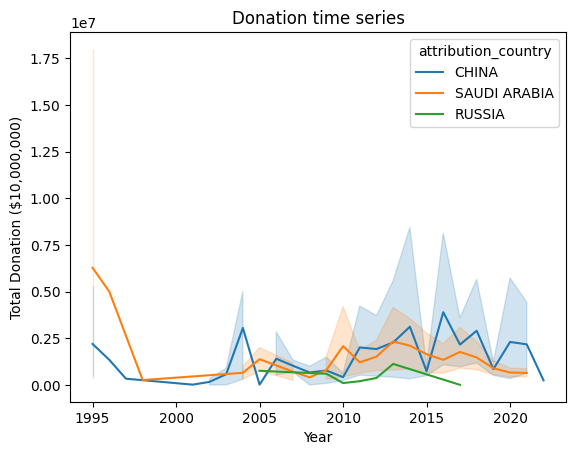

In [175]:
import pandas as pd
import seaborn as sns    

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band
graph_df['Unit'] = graph_df.groupby(['attribution_country','year']).cumcount()


ax = sns.lineplot(x="year", y="total_donation",
             hue="attribution_country",
             data=graph_df)
plt.ylabel('Total Donation ($10,000,000)')
plt.xlabel('Year')
plt.title('Donation time series')

plt.savefig('time_series.png', bbox_inches='tight')




In [ ]:
import pandas as pd
import seaborn as sns    

def _plot_range_band(*args, central_data=None, ci=None, data=None, **kwargs):
    upper = data.max(axis=0)
    lower = data.min(axis=0)
    #import pdb; pdb.set_trace()
    ci = np.asarray((lower, upper))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)

seaborn.timeseries._plot_range_band = _plot_range_band
graph_df['Unit'] = graph_df.groupby(['attribution_country','year']).cumcount()


ax = sns.lineplot(x="year", y="donation_log",
             hue="attribution_country",
             data=graph_df)
plt.ylabel('Log Donation')
plt.xlabel('Year')


plt.title('Log donation time series')

plt.savefig('log_time_series.png', bbox_inches='tight')


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/3000909434.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['Unit'] = graph_df.groupby(['attribution_country','year']).cumcount()


In [108]:
constants = df

constants = constants[['schoolname', 'state', 'public', 'federal10', 'tot_rev_wo_auxother_sum', 'r', 'federal_share',  'govt_reliance_a']]

constants = constants.drop_duplicates()


constants[constants['schoolname']=='Lincoln University']





,schoolname,state,public,federal10,tot_rev_wo_auxother_sum,r,federal_share,govt_reliance_a
1,Lincoln University,MO,1.0,22476659.0,47132426.0,,0.476883,0.681375
2,Lincoln University,CA,1.0,141250.0,3330369.0,,0.042413,NaN
22169,Lincoln University,PA,1.0,NaN,NaN,,NaN,NaN


In [109]:
df[(df['schoolname']== 'Columbia College')&(df['state']== 'MO')]



,opeid,schoolname,state,transactiontype,foreigngovernmentsource,attributioncountry,china,amount,receiptdate,contractstartdate,contractenddate,public,date_opened,date_closed,restrictedtransactionforeigng,l,restrictedtransactiondescripti,institutionownedbyforeignsou,foreignsourceownername,foreignsourceownershipdate,changesduetoforeignsourceow,legacydata,chinesepartner,dateopened,dateclosed,notes_dateclosed,statedreasonforclosing,r,m,t,actionpostciclosure,furtherdetails,notes,contacttitle,confuciusinstitutelink,category,statenvals,countrynvals,schoolnvals,CI,academicyear,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,meanfedshare,meangovtreliance,contract_year,receipt_year
15906,00245600,Columbia College,MO,Gift,N/A,HONG KONG,0.0,250000.0,1999-10-12,NaT,NaT,0.0,NaT,NaT,,,,,,NaT,,Yes,,,,,,,,,,,,,,,0.0,0.0,1.0,0.0,2012.0,1084088.0,98256778.0,0.011033,0.011135,0.080244,0.310541,NaN,1999.0
23845,00245600,Columbia College,MO,Gift,N/A,IRELAND,0.0,256467.0,1999-11-11,NaT,NaT,0.0,NaT,NaT,,,,,,NaT,,Yes,,,,,,,,,,,,,,,0.0,0.0,0.0,0.0,2012.0,1084088.0,98256778.0,0.011033,0.011135,0.080244,0.310541,NaN,1999.0
62681,00245600,Columbia College,MO,Gift,N/A,FRANCE,0.0,336995.0,1999-10-05,NaT,NaT,0.0,NaT,NaT,,,,,,NaT,,Yes,,,,,,,,,,,,,,,0.0,0.0,0.0,0.0,2012.0,1084088.0,98256778.0,0.011033,0.011135,0.080244,0.310541,NaN,1999.0


In [110]:
master_df = master_df[['schoolname', 'state',  'year', 'CI', 'CI_open', 'china_donation', 'attributioncountry', 'total_foreign_donation', 'total_donation']]




master_df =  master_df.merge(constants, how='left', left_on=['schoolname', 'state'], right_on=['schoolname', 'state'] )

master_df


,schoolname,state,year,CI,CI_open,china_donation,attributioncountry,total_foreign_donation,total_donation,public,federal10,tot_rev_wo_auxother_sum,r,federal_share,govt_reliance_a
0,Saint John's University,NY,1995.0,NaN,NaT,0,NaN,0.0,NaN,0.0,NaN,NaN,,NaN,NaN
1,Saint John's University,NY,1996.0,0.0,0,0,TAIWAN,899984.0,NaN,0.0,NaN,NaN,,NaN,NaN
2,Saint John's University,NY,1997.0,NaN,NaT,0,NaN,0.0,NaN,0.0,NaN,NaN,,NaN,NaN
3,Saint John's University,NY,1998.0,NaN,NaT,0,NaN,0.0,NaN,0.0,NaN,NaN,,NaN,NaN
4,Saint John's University,NY,1999.0,NaN,NaT,0,NaN,0.0,NaN,0.0,NaN,NaN,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16065,Indiana University-Purdue University,IN,2018.0,NaN,NaT,0,NaN,0.0,NaN,1.0,25397076.0,123054826.0,R?,0.206388,0.419468
16066,Indiana University-Purdue University,IN,2019.0,NaN,NaT,0,NaN,0.0,NaN,1.0,25397076.0,123054826.0,R?,0.206388,0.419468
16067,Indiana University-Purdue University,IN,2020.0,NaN,NaT,0,NaN,0.0,NaN,1.0,25397076.0,123054826.0,R?,0.206388,0.419468
16068,Indiana University-Purdue University,IN,2021.0,NaN,NaT,0,NaN,0.0,NaN,1.0,25397076.0,123054826.0,R?,0.206388,0.419468


In [96]:
master_df[master_df['schoolname']=='Alabama A&M University']


master_df[master_df['schoolname']=="Saint John's University"]



zero_china_donation = master_df[master_df['total_foreign_donation'].notna()]

zero_china_donation['total_donation'] = zero_china_donation['total_donation'].fillna(0)


zero_china_donation=zero_china_donation[['schoolname', 'state', 'year', 'total_donation']]

master_df = master_df.drop(columns = ['total_donation'])


master_df = master_df.merge(zero_china_donation, how='left', left_on=['schoolname', 'state', 'year'], right_on=['schoolname', 'state', 'year'] )



In [97]:
master_df[master_df['schoolname']=='Arizona State University']




,schoolname,state,year,CI,CI_open,china_donation,attributioncountry,total_foreign_donation,public,federal10,tot_rev_wo_auxother_sum,r,federal_share,govt_reliance_a,total_donation
2686,Arizona State University,AZ,1995.0,NaN,NaT,0,NaN,0.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2687,Arizona State University,AZ,1996.0,NaN,NaT,0,NaN,0.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2688,Arizona State University,AZ,1997.0,NaN,NaT,0,NaN,0.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2689,Arizona State University,AZ,1998.0,NaN,NaT,0,NaN,0.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2690,Arizona State University,AZ,1999.0,NaN,NaT,0,NaN,0.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,Arizona State University,AZ,2018.0,1.0,1,1,UNITED ARAB EMIRATES,15022223.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2779,Arizona State University,AZ,2019.0,1.0,1,1,CANADA,28645146.0,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2780,Arizona State University,AZ,2020.0,1.0,0,0,UNITED ARAB EMIRATES,5249345.5,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0
2781,Arizona State University,AZ,2021.0,1.0,0,0,BAHAMAS,4190357.3,1.0,340525000.0,1.425610e+09,,0.238863,0.434615,0.0


In [54]:


master_df = master_df.sort_values(by=['schoolname', 'state', 'year'])




master_df['schoolname'] = master_df['schoolname'].astype(str)



master_df['state'] = master_df['state'].astype(str)

master_df['CI_open'] = master_df['CI_open'].astype(str)


master_df = master_df.drop_duplicates(subset=['schoolname', 'state', 'year'], keep="first")



master_df


,schoolname,state,year,CI,CI_open,china_donation,attributioncountry,total_foreign_donation,total_donation,public,federal10,tot_rev_wo_auxother_sum,r,federal_share,govt_reliance_a
12061,Adelphi University,NY,1995.0,NaN,NaT,0,NaN,0.0,NaN,0.0,1895542.0,183775695.0,,0.010314,0.024485
12062,Adelphi University,NY,1996.0,NaN,NaT,0,NaN,0.0,NaN,0.0,1895542.0,183775695.0,,0.010314,0.024485
12063,Adelphi University,NY,1997.0,NaN,NaT,0,NaN,0.0,NaN,0.0,1895542.0,183775695.0,,0.010314,0.024485
12064,Adelphi University,NY,1998.0,NaN,NaT,0,NaN,0.0,NaN,0.0,1895542.0,183775695.0,,0.010314,0.024485
12065,Adelphi University,NY,1999.0,NaN,NaT,0,NaN,0.0,NaN,0.0,1895542.0,183775695.0,,0.010314,0.024485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Young Americans College of the Performing Arts...,CA,2018.0,NaN,NaT,0,NaN,0.0,NaN,0.0,NaN,NaN,,NaN,NaN
295,Young Americans College of the Performing Arts...,CA,2019.0,0.0,0,0,JAPAN,421583.0,NaN,0.0,NaN,NaN,,NaN,NaN
296,Young Americans College of the Performing Arts...,CA,2020.0,0.0,0,0,JAPAN,700000.0,NaN,0.0,NaN,NaN,,NaN,NaN
297,Young Americans College of the Performing Arts...,CA,2021.0,NaN,NaT,0,NaN,0.0,NaN,0.0,NaN,NaN,,NaN,NaN


In [61]:
master_df[master_df['schoolname']=="Arizona State University"]

transition= df_donations
transition['CI_open_years']= CI_open_years

transition = transition[transition['CI_open_years'].notna()]

transition = transition[['schoolname', 'state', 'CI_open_years']]


transition = transition.explode('CI_open_years')


transition['CI_open']= 1



master_df_clean = master_df.drop(columns=['CI_open'])


master_df_clean = master_df_clean.merge(transition, how = 'left',  left_on=['schoolname', 'state', 'year'], right_on=['schoolname', 'state', 'CI_open_years'])


master_df_clean = master_df_clean.drop_duplicates()


master_df_clean['CI_open'] = master_df_clean['CI_open'].fillna(0)



 
master_df_clean = master_df_clean.rename(columns={'CI': "CI_ever"})


master_df_clean['CI_open'] = master_df_clean['CI_open'].astype(int)


master_df_clean['year'] = master_df_clean['year'].astype(int)



master_df_clean['CI_ever'] = master_df_clean.groupby(['schoolname', 'state'])['CI_ever'].fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)




master_df_clean = master_df_clean[['schoolname', 'state',  'public', 'year', 'CI_ever', 'CI_open', 'r', 'china_donation', 'federal10', 'tot_rev_wo_auxother_sum', 'federal_share', 'govt_reliance_a','attributioncountry',  'total_foreign_donation','total_donation']]










/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/1345144759.py:42: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  master_df_clean['CI_ever'] = master_df_clean.groupby(['schoolname', 'state'])['CI_ever'].fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/1345144759.py:42: FutureWarning: The 'axis' keyword in SeriesGroupBy.fillna is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  master_df_clean['CI_ever'] = master_df_clean.groupby(['schoolname', 'state'])['CI_ever'].fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/1345144759.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will

In [62]:

# write up data description 
# make sure there are no sampling problems. Count number of private 
# look at characteristics for universities that take tons of China money that didn't set up a CI

In [63]:
CI_survival_years = master_df_clean[master_df_clean['CI_open']==1]




CI_survival_years['CI_survival_years'] = CI_survival_years.groupby(['schoolname', 'state'])['CI_open'].cumsum()
CI_survival_years = CI_survival_years[['schoolname', 'state', 'year', 'CI_survival_years']]


master_df_clean = master_df_clean.merge(CI_survival_years, how = 'left',  left_on=['schoolname', 'state', 'year'], right_on=['schoolname', 'state', 'year'])


# CI institute survival by years

No_CI_years = master_df_clean[master_df_clean['CI_open']==0]


No_CI_years['No_CI_True'] = 1

No_CI_years['No_CI_years'] = No_CI_years.groupby(['schoolname', 'state'])['No_CI_True'].cumsum()
No_CI_years = No_CI_years[['schoolname', 'state', 'year', 'No_CI_years']]


master_df_clean = master_df_clean.merge(No_CI_years, how = 'left',  left_on=['schoolname', 'state', 'year'], right_on=['schoolname', 'state', 'year'])




/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/2755284571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_survival_years['CI_survival_years'] = CI_survival_years.groupby(['schoolname', 'state'])['CI_open'].cumsum()
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/2755284571.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_CI_years['No_CI_True'] = 1
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_11765/2755284571.py:20: SettingWithCopyWarning: 
A val

In [64]:
master_df_clean[master_df_clean['schoolname']=='Arizona State University']

,schoolname,state,public,year,CI_ever,CI_open,r,china_donation,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,attributioncountry,total_foreign_donation,total_donation,CI_survival_years,No_CI_years
196,Arizona State University,AZ,1.0,1995,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,1.0
197,Arizona State University,AZ,1.0,1996,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,2.0
198,Arizona State University,AZ,1.0,1997,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,3.0
199,Arizona State University,AZ,1.0,1998,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,4.0
200,Arizona State University,AZ,1.0,1999,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,5.0
201,Arizona State University,AZ,1.0,2000,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,6.0
202,Arizona State University,AZ,1.0,2001,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,7.0
203,Arizona State University,AZ,1.0,2002,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,0.0,NaN,NaN,8.0
204,Arizona State University,AZ,1.0,2003,1.0,0,,1,340525000.0,1.425610e+09,0.238863,0.434615,CHINA,820000.0,820000.0,NaN,9.0
205,Arizona State University,AZ,1.0,2004,1.0,0,,0,340525000.0,1.425610e+09,0.238863,0.434615,KOREA,1911538.0,NaN,NaN,10.0


In [65]:

# create variable for survival analysis

In [66]:

master_df_clean[master_df_clean['schoolname']=='Alabama A&M University']


master_df_clean[master_df_clean['schoolname']=='Alabama A&M University']



constants

master_df_clean[master_df_clean['schoolname']=="Saint John's University"]

constants[constants['schoolname']=="Saint John's University"]



,schoolname,state,public,federal10,tot_rev_wo_auxother_sum,r,federal_share,govt_reliance_a
0,Saint John's University,NY,0.0,NaN,NaN,,NaN,NaN
47026,Saint John's University,MN,0.0,NaN,NaN,,NaN,NaN


In [69]:
master_df_clean[master_df_clean['schoolname']=='Arizona State University']

duplicate_rows = master_df_clean[master_df_clean.duplicated()]


master_df_clean[master_df_clean['total_foreign_donation']==0]

df[df['schoolname']=='Gill-Tech Academy of Hair Design']






len(master_df_clean[master_df_clean['schoolname']=='Arizona State University'])









28

In [71]:
from collections import Counter



master_df_clean[master_df_clean['schoolname'].isin(['Columbia College','Lincoln University', 'Bryant & Stratton Colleg','MBTI Business Training Institute', "Saint John's University"])]

master_df_clean[master_df_clean['schoolname']=="Saint John's University"]
df[df['schoolname']=="Saint John's University"]


master_df_clean['university_state'] = master_df_clean['schoolname']+ '_'+master_df_clean['state']


master_df_clean = master_df_clean[['university_state', 'schoolname', 'state',  'public', 'year', 'CI_ever', 'CI_open', 'No_CI_years', 'CI_survival_years', 'r', 'china_donation', 'federal10', 'tot_rev_wo_auxother_sum', 'federal_share', 'govt_reliance_a', 'attributioncountry',  'total_donation']]






In [72]:

len(master_df_clean['schoolname'].unique())

540

In [73]:
master_df_clean[master_df_clean['schoolname']=='Arizona State University']

master_df_clean[master_df_clean['schoolname']=='Gill-Tech Academy of Hair Design']

# change code so that it automates output of graphs
master_df_clean[master_df_clean['schoolname']=='Georgetown University']

master_df_clean[master_df_clean['schoolname']=='Arizona State University']



,university_state,schoolname,state,public,year,CI_ever,CI_open,No_CI_years,CI_survival_years,r,china_donation,federal10,tot_rev_wo_auxother_sum,federal_share,govt_reliance_a,attributioncountry,total_donation
196,Arizona State University_AZ,Arizona State University,AZ,1.0,1995,1.0,0,1.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
197,Arizona State University_AZ,Arizona State University,AZ,1.0,1996,1.0,0,2.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
198,Arizona State University_AZ,Arizona State University,AZ,1.0,1997,1.0,0,3.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
199,Arizona State University_AZ,Arizona State University,AZ,1.0,1998,1.0,0,4.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
200,Arizona State University_AZ,Arizona State University,AZ,1.0,1999,1.0,0,5.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
201,Arizona State University_AZ,Arizona State University,AZ,1.0,2000,1.0,0,6.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
202,Arizona State University_AZ,Arizona State University,AZ,1.0,2001,1.0,0,7.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
203,Arizona State University_AZ,Arizona State University,AZ,1.0,2002,1.0,0,8.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,NaN,NaN
204,Arizona State University_AZ,Arizona State University,AZ,1.0,2003,1.0,0,9.0,NaN,,1,340525000.0,1.425610e+09,0.238863,0.434615,CHINA,820000.0
205,Arizona State University_AZ,Arizona State University,AZ,1.0,2004,1.0,0,10.0,NaN,,0,340525000.0,1.425610e+09,0.238863,0.434615,KOREA,NaN


In [74]:
master_df_clean[master_df_clean['schoolname']=='Columbia College']['university_state'].unique()
master_df_clean[master_df_clean['schoolname']=='Lincoln University']['university_state'].unique()
master_df_clean[master_df_clean['schoolname']=='Bryant & Stratton College']['university_state'].unique()
master_df_clean[master_df_clean['schoolname']=='MBTI Business Training Institute']['university_state'].unique()
master_df_clean[master_df_clean['schoolname']=='Marian University']['university_state'].unique()


Counter(list(master_df_clean['schoolname']))


master_df_clean[master_df_clean['schoolname']=="Saint John's University"]['university_state'].unique()



array(["Saint John's University_MN", "Saint John's University_NY"],
      dtype=object)

In [75]:
empty_university_with_error = df[df['CI'].isna()][['schoolname', 'state']]

empty_university_with_error['university_state'] = empty_university_with_error['schoolname']+'_'+empty_university_with_error['state']

empty_university_with_error = list(empty_university_with_error['university_state'])



In [76]:
master_df_clean[master_df_clean['schoolname']=='Columbia College']['university_state'].unique()

public = ['Columbia College_CA', 'Lincoln University_MO', 'Lincoln University_PA']

private = ['Columbia College_MO', 'Columbia College_SC', 'Columbia College_VA', 'Lincoln University_CA', 'Bryant & Stratton College_NY', 'Bryant & Stratton College_OH', 'MBTI Business Training Institute_PR', 'MBTI Business Training Institute_WI', 'Marian University_IN', 'Marian University_WI', "Saint John's University_MN","Saint John's University_NY" ]


master_df_clean.loc[(master_df_clean['university_state'].isin(public)), 'public'] = 1

master_df_clean.loc[(master_df_clean['university_state'].isin(private)), 'public'] = 0


master_df_clean[master_df_clean['university_state']== 'Lincoln University_CA']



master_df_clean = master_df_clean[~master_df_clean["university_state"].isin(empty_university_with_error)]




In [77]:
#demographics = pd.read_excel('tabn310.20.xlsx')

In [78]:
#demographics.dtypes

#demographics[demographics.columns[0]]

#ind_list = [0, 3, 12]
#demographics = demographics.iloc[ind_list].dropna(axis=1)
#demographics.columns = demographics.iloc[0]

#demographics= demographics.iloc[1: , :]

#demographics_china= demographics.iloc[1: , :]

#demographics_total = demographics.drop([12],axis=0)

#demographics_china_long = demographics_china.melt()

#demographics_total_long = demographics_total.melt()

#demographics_china_long.columns = demographics_china_long.iloc[0]

#demographics_total_long.columns = demographics_total_long.iloc[0]

#demographics_china_long= demographics_china_long.iloc[1: , :]


#demographics_total_long= demographics_total_long.iloc[1: , :]

#demographics_china_long = demographics_china_long.rename(columns={"Continent, region, and selected countries of origin": "demographic_years", '    China': "china_students_in_USA"})


#demographics_total_long = demographics_total_long.rename(columns={"Continent, region, and selected countries of origin": "demographic_years", '     Total ' : "total_foreign_students"})




In [79]:
#demographics_clean = demographics_china_long.merge(demographics_total_long)

#demographics_clean['china_student_percent'] = (demographics_clean['china_students_in_USA']/demographics_clean['total_foreign_students'])*100

#start_school_year= []

#end_school_year= []

#for i in demographics_clean['demographic_years']:
#    start_school_year.append(int(i[0:4]))
#    end_school_year.append(int(i[0:2]+i[5:7]))

#demographics_clean['year'] = start_school_year

#demographics_clean['end_school_year'] = end_school_year

# add total foreign

#demographics_for_merge = demographics_clean[['year', 'china_students_in_USA', 'total_foreign_students', 'china_student_percent']]

#demographics_for_merge

In [80]:
#master_df_clean = master_df_clean.merge(demographics_for_merge, how='left', left_on=['year'], right_on=['year'])


#master_df_clean['china_students_in_USA'] = master_df_clean['china_students_in_USA'].astype(float)
#master_df_clean['total_foreign_students'] = master_df_clean['total_foreign_students'].astype(float)
#master_df_clean['china_student_percent'] = master_df_clean['china_student_percent'].astype(float)



In [104]:
#master_df_clean['china_donation_proportion']= master_df_clean['total_china_donation']/master_df_clean['tot_rev_wo_auxother_sum']





In [83]:
# create cumulative china donation variable





In [84]:


#master_df_enroll = master_df_clean.merge(enrollment_long, how='left', left_on=['schoolname', 'year'], right_on=['Institution Name','year'])



In [86]:





#initial_data = master_df_enroll[['UnitID','university_state', 'schoolname', 'year', 'CI_open',  'public', 'Enrollment', 'federal_share' , 'total_foreign_donation', 'total_china_donation' ]]

initial_data = master_df_clean[['university_state', 'schoolname', 'year', 'CI_open',  'public', 'federal_share' , 'total_donation', 'attributioncountry' ]]

initial_data[initial_data['schoolname']=='Harvard University']



# create labels for variables


#enrollment_long[enrollment_long['Institution Name']== 'Adelphi University']










,university_state,schoolname,year,CI_open,public,federal_share,total_donation,attributioncountry
4256,Harvard University_MA,Harvard University,1995,0,0.0,0.380216,NaN,SWITZERLAND
4257,Harvard University_MA,Harvard University,1996,0,0.0,0.380216,NaN,ENGLAND
4258,Harvard University_MA,Harvard University,1997,0,0.0,0.380216,NaN,NaN
4259,Harvard University_MA,Harvard University,1998,0,0.0,0.380216,NaN,NaN
4260,Harvard University_MA,Harvard University,1999,0,0.0,0.380216,NaN,NaN
4261,Harvard University_MA,Harvard University,2000,0,0.0,0.380216,NaN,SWITZERLAND
4262,Harvard University_MA,Harvard University,2001,0,0.0,0.380216,NaN,HONG KONG
4263,Harvard University_MA,Harvard University,2002,0,0.0,0.380216,NaN,ENGLAND
4264,Harvard University_MA,Harvard University,2003,0,0.0,0.380216,NaN,KENYA
4265,Harvard University_MA,Harvard University,2004,0,0.0,0.380216,NaN,ENGLAND


In [75]:
print((initial_data[initial_data['public']==1]['total_china_donation'].max()))

print((initial_data[initial_data['public']==1]['total_china_donation'].min()))

print((initial_data[initial_data['public']==0]['total_china_donation'].max()))

print((initial_data[initial_data['public']==0]['total_china_donation'].min()))


26512253.0
0.0
36941001.0
0.0


In [76]:
test_val = master_df_clean[['schoolname','state']]
test_val = test_val.drop_duplicates()






print(len(test_val)*len(master_df_clean[master_df_clean['schoolname']=='Arizona State University']))

len(master_df_clean)


15176


15176

In [77]:
# modify this code with new data
survival_df = master_df_clean[master_df_clean['year']<2020]

survival_df['CI_opening'] = survival_df['CI_open'].diff()


# put experiment cut off year at 2020 based on Trump crackdown https://www.pacificresearch.org/trump-administration-cracks-down-on-chinas-u-s-education-propaganda/

survival_df[survival_df['schoolname']=='Arizona State University']






survival_df['all_year_china_donations'] = survival_df.groupby('university_state')['total_china_donation'].transform('sum')



survival_df['all_year_foreign_donations'] = survival_df.groupby('university_state')['total_foreign_donation'].transform('sum')

survival_df['all_year_federal10'] = survival_df.groupby('university_state')['federal10'].transform('sum')



survival_df['all_year_tot_rev_wo_auxother_sum'] = survival_df.groupby('university_state')['tot_rev_wo_auxother_sum'].transform('sum')






survival_df = survival_df[['university_state','schoolname', 'state','public', 'year','CI_ever', 'No_CI_years','CI_opening', 'CI_survival_years', 'federal_share', 'total_china_donation', 'cumulative_china_donations','all_year_federal10','all_year_tot_rev_wo_auxother_sum','all_year_china_donations','all_year_foreign_donations']]

survival_df_no_CI = survival_df[survival_df['CI_ever']==0]

survival_df_no_CI= survival_df_no_CI[survival_df_no_CI['year']==2019]


# if status = 0, then the data was censored
survival_df_no_CI['status'] = 0


survival_df_got_CI = survival_df


survival_df_got_CI['No_CI_years']  = survival_df_got_CI.groupby('university_state')['No_CI_years'].ffill()


survival_df_got_CI = survival_df[survival_df['CI_opening']==1]
survival_df_got_CI['status'] = 1

survival_df_clean = pd.concat([survival_df_got_CI, survival_df_no_CI])




/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1805358302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_df['CI_opening'] = survival_df['CI_open'].diff()
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1805358302.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_df['all_year_china_donations'] = survival_df.groupby('university_state')['total_china_donation'].transform('sum')
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1805358302.p

In [78]:

survival_df[survival_df['university_state']=='University of Oregon_OR']



,university_state,schoolname,state,public,year,CI_ever,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations
12768,University of Oregon_OR,University of Oregon,OR,1.0,1995,1.0,1.0,-1.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12769,University of Oregon_OR,University of Oregon,OR,1.0,1996,1.0,2.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12770,University of Oregon_OR,University of Oregon,OR,1.0,1997,1.0,3.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12771,University of Oregon_OR,University of Oregon,OR,1.0,1998,1.0,4.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12772,University of Oregon_OR,University of Oregon,OR,1.0,1999,1.0,5.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12773,University of Oregon_OR,University of Oregon,OR,1.0,2000,1.0,6.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12774,University of Oregon_OR,University of Oregon,OR,1.0,2001,1.0,7.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12775,University of Oregon_OR,University of Oregon,OR,1.0,2002,1.0,8.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12776,University of Oregon_OR,University of Oregon,OR,1.0,2003,1.0,9.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0
12777,University of Oregon_OR,University of Oregon,OR,1.0,2004,1.0,10.0,0.0,NaN,0.216801,0.0,0.0,3.076656e+09,1.419117e+10,770600.0,15361027.0


In [79]:
len(survival_df_clean[survival_df_clean['all_year_china_donations']>0])
len(survival_df_clean[survival_df_clean['all_year_china_donations']==0])

352

In [80]:

len(survival_df['university_state'].unique())


len(survival_df_clean['university_state'].unique())




len(survival_df_no_CI[survival_df_no_CI['year']==2019])

len(survival_df[survival_df['CI_ever']==0]['university_state'].unique())



458

In [81]:
len(survival_df_clean)


len(survival_df_clean['university_state'].unique())


528

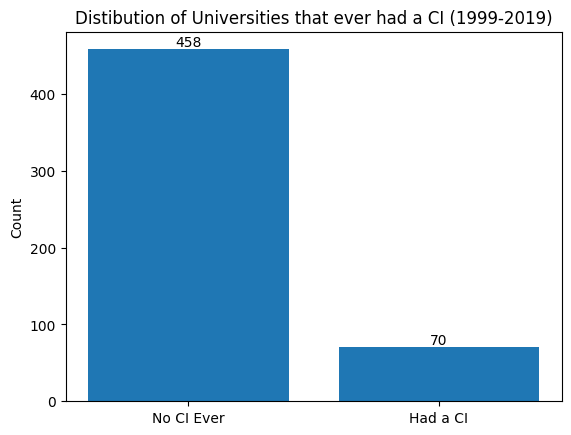

In [82]:
# start doing descriptive statistics based on Christine's requests

# descriptive Stats

# Number of schools 

from matplotlib import pyplot as plt


len(initial_data['university_state'].unique())


initial_data[initial_data['CI_open']==1]['university_state'].unique()



# Number of schools by CI ever

bar_df = survival_df_clean.groupby('CI_ever').count().reset_index()

bar_df = bar_df.rename(columns={"university_state": "Number of Schools"})



bar_df['CI_ever'] = bar_df['CI_ever'].map({0: 'No CI Ever', 1: 'Had a CI'})


x = bar_df['CI_ever']
y = bar_df['Number of Schools']

fig, ax = plt.subplots()
bars = ax.bar(x, y)

ax.bar_label(bars)

plt.ylabel("Count")



plt.title('Distibution of Universities that ever had a CI (1999-2019)')

fig.figure.savefig('CI_ever_bar.png', bbox_inches='tight')



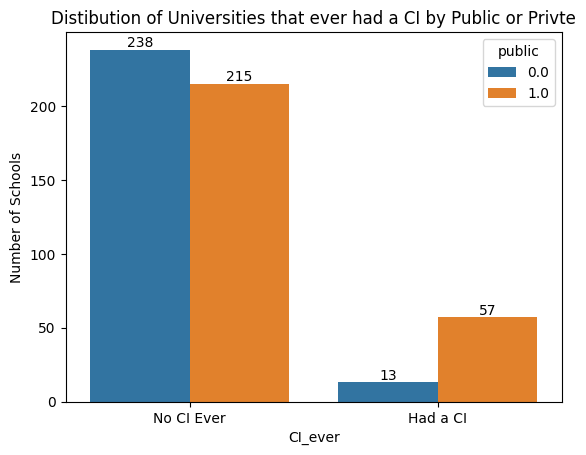

In [83]:

import seaborn as sns

bar_df = survival_df_clean


bar_df = bar_df.groupby(['CI_ever', 'public']).count().reset_index()



bar_df = bar_df.rename(columns={"university_state": "Number of Schools"})



bar_df['CI_ever'] = bar_df['CI_ever'].map({0: 'No CI Ever', 1: 'Had a CI'})


x = bar_df['CI_ever']
y = bar_df['Number of Schools']
color = bar_df['public']

ax = sns.barplot(data=bar_df, x=x, y=y, hue=color)


for i in ax.containers:
    ax.bar_label(i,)


plt.title('Distibution of Universities that ever had a CI by Public or Privte')






plt.savefig('CI_ever_pub_bar.png', bbox_inches='tight')


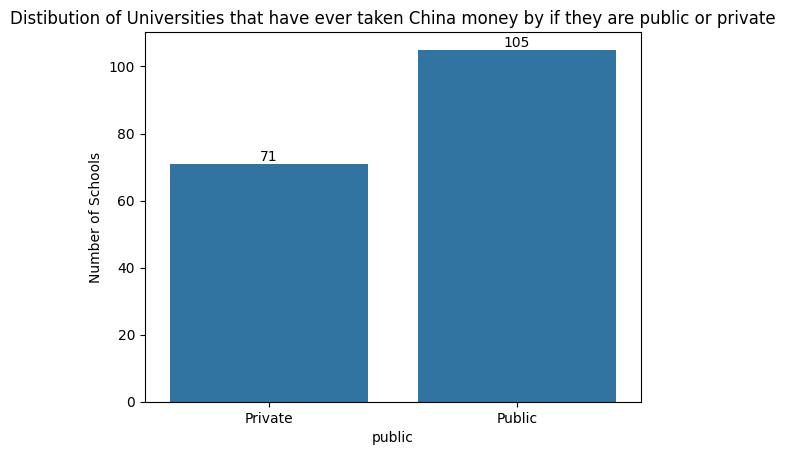

In [84]:


bar_df = survival_df_clean[survival_df_clean['all_year_china_donations']>0]



bar_df = bar_df.groupby(['public']).count().reset_index()



bar_df = bar_df.rename(columns={"university_state": "Number of Schools"})



bar_df['public'] = bar_df['public'].map({0: 'Private', 1: 'Public'})


x = bar_df['public']
y = bar_df['Number of Schools']

fig, ax = plt.subplots()

ax = sns.barplot(data=bar_df, x=x, y=y)

for i in ax.containers:
    ax.bar_label(i,)




plt.title('Distibution of Universities that have ever taken China money by if they are public or private')

fig.figure.savefig('china_money_pub_bar.png', bbox_inches='tight')

/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/2208822900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['china_ever'] = np.where(bar_df['all_year_china_donations']>0, 1, 0)


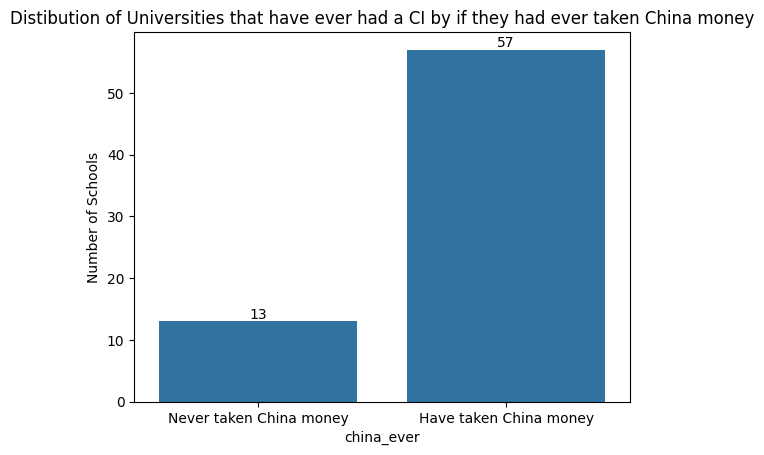

In [85]:
bar_df = survival_df_clean[survival_df_clean['CI_ever']==1]

bar_df['china_ever'] = np.where(bar_df['all_year_china_donations']>0, 1, 0)



bar_df = bar_df.groupby(['china_ever']).count().reset_index()



bar_df = bar_df.rename(columns={"university_state": "Number of Schools"})



bar_df['china_ever'] = bar_df['china_ever'].map({0: 'Never taken China money', 1: 'Have taken China money'})




x = bar_df['china_ever']
y = bar_df['Number of Schools']

fig, ax = plt.subplots()

ax = sns.barplot(data=bar_df, x=x, y=y)

for i in ax.containers:
    ax.bar_label(i,)




plt.title('Distibution of Universities that have ever had a CI by if they had ever taken China money')

fig.figure.savefig('CI_ever_China_money_bar.png', bbox_inches='tight')

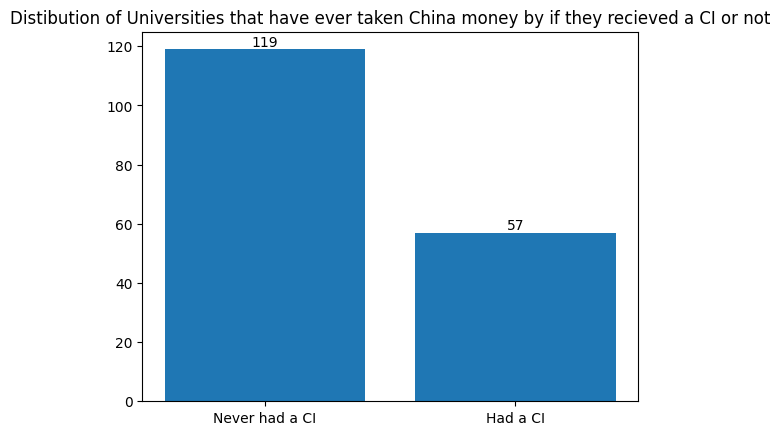

In [86]:
# enrollment summary stats


bar_df = survival_df_clean[survival_df_clean['all_year_china_donations']>0]



bar_df = bar_df.groupby('CI_ever').count().reset_index()



bar_df = bar_df.rename(columns={"university_state": "Number of Schools"})



bar_df['CI_ever'] = bar_df['CI_ever'].map({0: 'Never had a CI', 1: 'Had a CI'})


x = bar_df['CI_ever']
y = bar_df['Number of Schools']

fig, ax = plt.subplots()
bars = ax.bar(x, y)

ax.bar_label(bars)




plt.title('Distibution of Universities that have ever taken China money by if they recieved a CI or not')

fig.figure.savefig('china_money_CI_bar.png', bbox_inches='tight')


In [87]:
bar_df

,CI_ever,Number of Schools,schoolname,state,public,year,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations,status
0,Never had a CI,119,119,119,119,119,119,119,0,73,119,119,119,119,119,119,119
1,Had a CI,57,57,57,57,57,57,57,57,52,57,57,57,57,57,57,57


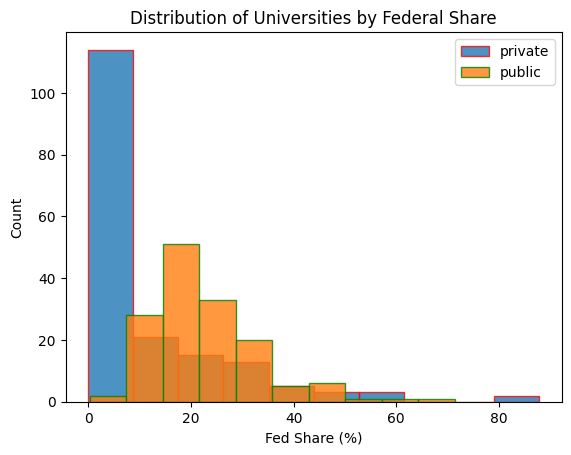

In [88]:
# do histograms for Fed Share and Chinese money summaries
from PIL import Image



hist = survival_df_clean

hist['public/private'] = hist['public'].map({0: 'private', 1: 'public'})

priv_group =  hist[hist['public']==0]['federal_share']*100

pub_group= hist[hist['public']==1]['federal_share']*100


fig, axs = plt.subplots()

plt.hist(priv_group, label='private', alpha=.8, edgecolor='red')


plt.hist(pub_group, label='public', alpha=.8, edgecolor='green')

#fig = plt.hist(plot, normed=0)


plt.legend()


plt.xlabel("Fed Share (%)")
plt.ylabel("Count")


plt.title('Distribution of Universities by Federal Share')

# Showing the plot using plt.show()
plt.show()

fig.figure.savefig('fed_share_hist.png', bbox_inches='tight')

In [89]:
survival_df

,university_state,schoolname,state,public,year,CI_ever,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations
0,Adelphi University_NY,Adelphi University,NY,0.0,1995,0.0,1.0,NaN,NaN,0.010314,0.0,0.0,47388550.0,4.594392e+09,0.0,1000000.0
1,Adelphi University_NY,Adelphi University,NY,0.0,1996,0.0,2.0,0.0,NaN,0.010314,0.0,0.0,47388550.0,4.594392e+09,0.0,1000000.0
2,Adelphi University_NY,Adelphi University,NY,0.0,1997,0.0,3.0,0.0,NaN,0.010314,0.0,0.0,47388550.0,4.594392e+09,0.0,1000000.0
3,Adelphi University_NY,Adelphi University,NY,0.0,1998,0.0,4.0,0.0,NaN,0.010314,0.0,0.0,47388550.0,4.594392e+09,0.0,1000000.0
4,Adelphi University_NY,Adelphi University,NY,0.0,1999,0.0,5.0,0.0,NaN,0.010314,0.0,0.0,47388550.0,4.594392e+09,0.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,Young Americans College of the Performing Arts...,Young Americans College of the Performing Arts...,CA,0.0,2015,0.0,21.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,421583.0
15365,Young Americans College of the Performing Arts...,Young Americans College of the Performing Arts...,CA,0.0,2016,0.0,22.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,421583.0
15366,Young Americans College of the Performing Arts...,Young Americans College of the Performing Arts...,CA,0.0,2017,0.0,23.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,421583.0
15367,Young Americans College of the Performing Arts...,Young Americans College of the Performing Arts...,CA,0.0,2018,0.0,24.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,421583.0


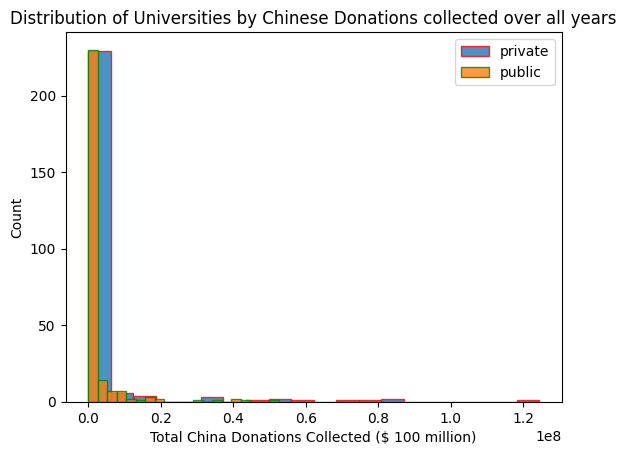

In [90]:
# do histograms for Fed Share and Chinese money summaries
from PIL import Image

# tryt 

hist = survival_df_clean


priv_group =  hist[hist['public']==0]['all_year_china_donations']

pub_group= hist[hist['public']==1]['all_year_china_donations']






fig, axs = plt.subplots()

plt.hist(priv_group, label='private', alpha=.8, edgecolor='red', bins=20)


plt.hist(pub_group, label='public', alpha=.8, edgecolor='green', bins=20)

#fig = plt.hist(plot, normed=0)


plt.legend()


plt.xlabel("Total China Donations Collected ($ 100 million)")
plt.ylabel("Count")


plt.title('Distribution of Universities by Chinese Donations collected over all years')

# Showing the plot using plt.show()
plt.show()

fig.figure.savefig('china_donation_hist.png', bbox_inches='tight')


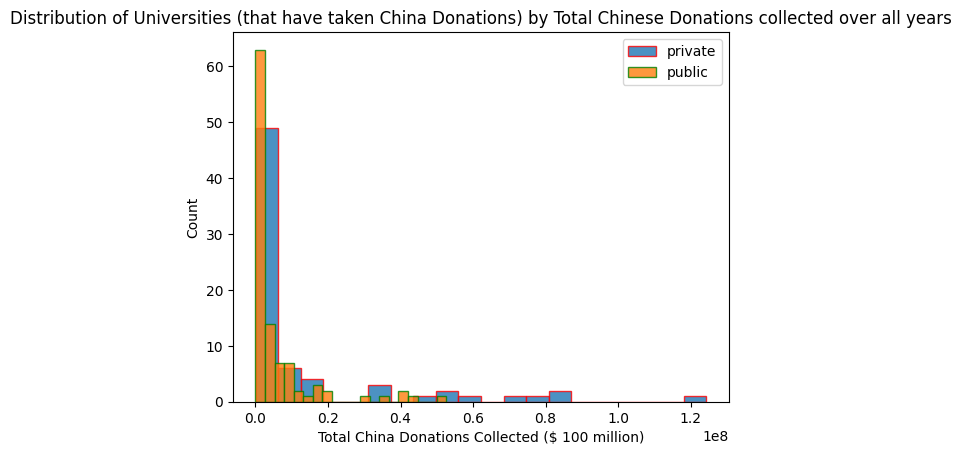

In [91]:
# do histograms for Fed Share and Chinese money summaries
from PIL import Image

# tryt 

hist = survival_df_clean[survival_df_clean['all_year_china_donations']>0]


priv_group =  hist[hist['public']==0]['all_year_china_donations']

pub_group= hist[hist['public']==1]['all_year_china_donations']






fig, axs = plt.subplots()

plt.hist(priv_group, label='private', alpha=.8, edgecolor='red', bins=20)


plt.hist(pub_group, label='public', alpha=.8, edgecolor='green', bins=20)

#fig = plt.hist(plot, normed=0)


plt.legend()


plt.xlabel("Total China Donations Collected ($ 100 million)")
plt.ylabel("Count")


plt.title('Distribution of Universities (that have taken China Donations) by Total Chinese Donations collected over all years')

# Showing the plot using plt.show()
plt.show()

fig.figure.savefig('china_donation_taken_hist.png', bbox_inches='tight')


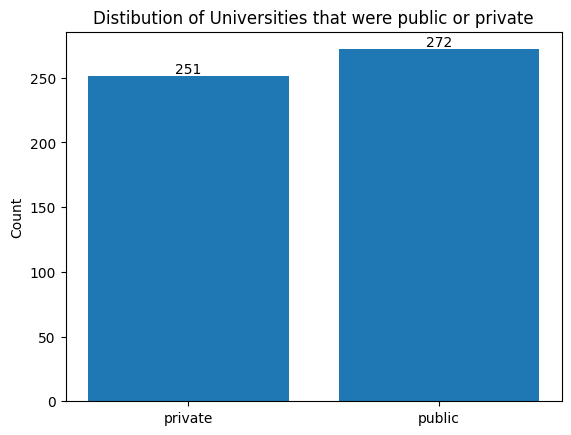

In [92]:
# Number of schools by Public Private 

bar_df = survival_df_clean.groupby('public').count().reset_index()

bar_df = bar_df.rename(columns={"university_state": "Number of Schools"})



bar_df['public/private'] = bar_df['public'].map({0: 'private', 1: 'public'})


x = bar_df['public/private']
y = bar_df['Number of Schools']

fig, ax = plt.subplots()
bars = ax.bar(x, y)

ax.bar_label(bars)



plt.ylabel("Count")


plt.title('Distibution of Universities that were public or private')

fig.figure.savefig('pub_priv_bar.png', bbox_inches='tight')


In [93]:
survival_df[survival_df['university_state']=='Alfred University_NY']


len(survival_df_clean)

528

In [94]:
china_donation_log_non_norm = []


non_normalized_df = survival_df


for i in non_normalized_df['total_china_donation']:
    if i !=0:
        china_donation_log_non_norm.append(math.log(i))
    else:
        i_mod = i+1
        china_donation_log_non_norm.append(math.log(i_mod))
        
non_normalized_df['china_donation_log_non_norm'] = china_donation_log_non_norm
ols = non_normalized_df

In [105]:
ols

NameError: name 'ols' is not defined

In [95]:
non_normalized_df.to_csv('non_normalized_data.csv')

In [96]:
ols_CI = ols[ols['CI_ever']==1]

ols_no_CI = ols[ols['CI_ever']==0]

ols_public_CI = ols[(ols['CI_ever']==1)&(ols['public']==1) ]

ols_private_CI = ols[(ols['CI_ever']==1)&(ols['public']==0) ]



In [97]:
from stargazer.stargazer import Stargazer
y_1 =ols['china_donation_log_non_norm']

x_1= ols[['year']]

x_1 = sm.add_constant(x_1)

result_CI = sm.OLS(y_1, x_1).fit()


y_2 =ols_no_CI['china_donation_log_non_norm']
x_2 = ols_no_CI[['year']]

x_2 = sm.add_constant(x_2)

result_no_CI = sm.OLS(y_2, x_2).fit()

y_3 =ols_public_CI['china_donation_log_non_norm']

x_3 = ols_public_CI[['year']]

x_3 = sm.add_constant(x_3)

result_pub_CI = sm.OLS(y_3, x_3).fit()



y_4 =ols_private_CI['china_donation_log_non_norm']

x_4 = ols_private_CI[['year']]

x_4 = sm.add_constant(x_4)

result_priv_CI = sm.OLS(y_4, x_4).fit()



stargazer = Stargazer([result_CI, result_no_CI, result_pub_CI, result_priv_CI])




HTML(stargazer.render_latex())

NameError: name 'HTML' is not defined

In [ ]:
# OLS without interactions
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from IPython.core.display import HTML

 






import seaborn as sns

ax = sns.regplot(x='year', y='china_donation_log_non_norm', order=1, label="All Universities", data=ols)

ax.legend(loc="best")


ax_no_CI = sns.regplot(x='year', y='china_donation_log_non_norm', order=1, label="No CI", data=ols_no_CI)

ax_no_CI.legend(loc="best")


ax_CI_pub = sns.regplot(x='year', y='china_donation_log_non_norm', order=1, label="Public and CI", data=ols_public_CI)

ax_CI_pub.legend(loc="best")


ax_CI_priv = sns.regplot(x='year', y='china_donation_log_non_norm', order=1, label="Private and CI", data=ols_private_CI)

ax_CI_priv.legend(loc="best")


ax_CI = sns.regplot(x='year', y='china_donation_log_non_norm', order=1, label="CI",  data=ols_CI)

ax_CI.legend(loc="best")

plt.title("Linear models of log Chinese funding over time")
plt.savefig('regressions.png')



# adding the constant term
# performing the regression
# and fitting the model
 
# printing the summary table

# make graphs from using pregrouped 

In [98]:
uni_names_filter= survival_df[survival_df['all_year_china_donations']>0]['university_state'].unique()
normalized_df = survival_df[(survival_df['CI_ever']==1)&(survival_df['university_state'].isin(uni_names_filter))]


uni_names = normalized_df['university_state'].unique()


In [99]:


# do t0 analysis with total_china_donation statistic for one university first
import itertools
# make number line based on CI_opening column

school_timeline_list = []

for i in uni_names:
    school_timeline = normalized_df[normalized_df['university_state']== i]
    No_CI_years = (school_timeline['No_CI_years']-school_timeline['No_CI_years'].max()-1).drop_duplicates()
    CI_years = school_timeline['CI_survival_years'].dropna()-1
    timeline = pd.concat([No_CI_years, CI_years]).to_list()
    #school_timeline['timeline'] = timeline
    school_timeline_list.append(timeline)
    




school_timeline_clean = list(itertools.chain.from_iterable(school_timeline_list))


normalized_df['timeline'] = school_timeline_clean


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/441387400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df['timeline'] = school_timeline_clean


In [100]:
uni_names_filter

uni_names_check= survival_df[survival_df['all_year_china_donations']>0]['university_state'].unique()


print(set(uni_names_check).difference(uni_names_filter))


survival_df[survival_df['university_state']=='Yale University_CT']

survival_df_clean[survival_df_clean['university_state']=='Arizona State University_AZ']

survival_df[survival_df['university_state']=='Arizona State University_AZ']


set()


,university_state,schoolname,state,public,year,CI_ever,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations,china_donation_log_non_norm
196,Arizona State University_AZ,Arizona State University,AZ,1.0,1995,1.0,1.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
197,Arizona State University_AZ,Arizona State University,AZ,1.0,1996,1.0,2.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
198,Arizona State University_AZ,Arizona State University,AZ,1.0,1997,1.0,3.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
199,Arizona State University_AZ,Arizona State University,AZ,1.0,1998,1.0,4.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
200,Arizona State University_AZ,Arizona State University,AZ,1.0,1999,1.0,5.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
201,Arizona State University_AZ,Arizona State University,AZ,1.0,2000,1.0,6.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
202,Arizona State University_AZ,Arizona State University,AZ,1.0,2001,1.0,7.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
203,Arizona State University_AZ,Arizona State University,AZ,1.0,2002,1.0,8.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
204,Arizona State University_AZ,Arizona State University,AZ,1.0,2003,1.0,9.0,0.0,NaN,0.238863,820000.0,820000.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,13.617060
205,Arizona State University_AZ,Arizona State University,AZ,1.0,2004,1.0,10.0,0.0,NaN,0.238863,0.0,820000.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000


In [101]:
normalized_df

,university_state,schoolname,state,public,year,CI_ever,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations,china_donation_log_non_norm,timeline
84,Alfred University_NY,Alfred University,NY,0.0,1995,1.0,1.0,0.0,NaN,0.122902,0.0,0.0,1.302940e+08,1.060146e+09,541841.0,12967567.0,0.000000,-14.0
85,Alfred University_NY,Alfred University,NY,0.0,1996,1.0,2.0,0.0,NaN,0.122902,0.0,0.0,1.302940e+08,1.060146e+09,541841.0,12967567.0,0.000000,-13.0
86,Alfred University_NY,Alfred University,NY,0.0,1997,1.0,3.0,0.0,NaN,0.122902,0.0,0.0,1.302940e+08,1.060146e+09,541841.0,12967567.0,0.000000,-12.0
87,Alfred University_NY,Alfred University,NY,0.0,1998,1.0,4.0,0.0,NaN,0.122902,0.0,0.0,1.302940e+08,1.060146e+09,541841.0,12967567.0,0.000000,-11.0
88,Alfred University_NY,Alfred University,NY,0.0,1999,1.0,5.0,0.0,NaN,0.122902,0.0,0.0,1.302940e+08,1.060146e+09,541841.0,12967567.0,0.000000,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15280,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2015,1.0,17.0,0.0,4.0,0.461971,160554.0,408445.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,11.986386,3.0
15281,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2016,1.0,17.0,0.0,5.0,0.461971,73628.0,482073.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,11.206781,4.0
15282,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2017,1.0,17.0,0.0,6.0,0.461971,303916.0,785989.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,12.624507,5.0
15283,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2018,1.0,17.0,0.0,7.0,0.461971,110402.0,896391.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,11.611884,6.0


Text(0, 0.5, 'Total Chinese donations in a year ($ million)')

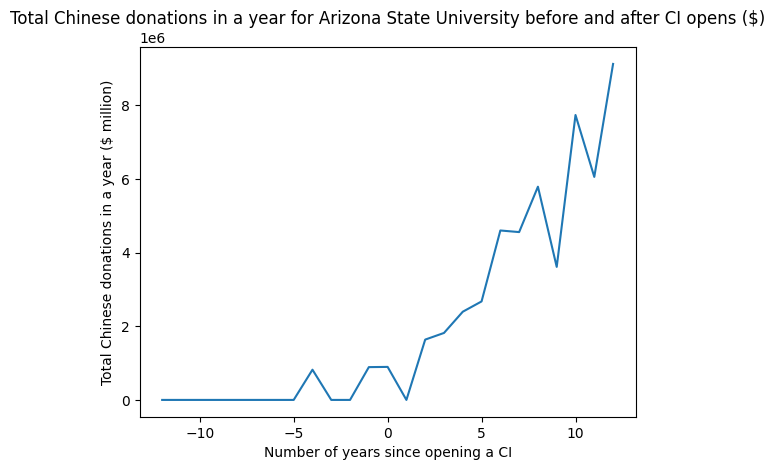

In [102]:
graph_test = normalized_df[normalized_df['university_state']== 'Arizona State University_AZ']

y = graph_test['total_china_donation']
x = graph_test['timeline']


# Create a line plot


plt.plot(x, y)


plt.title("Total Chinese donations in a year for " + graph_test['schoolname'].to_list()[1] + " before and after CI opens ($)")

plt.xlabel("Number of years since opening a CI")
plt.ylabel("Total Chinese donations in a year ($ million)")

# make graphs for each university with normalized data

In [103]:

for i in uni_names:
    graph_test = normalized_df[normalized_df['university_state']== i]
    y = graph_test['total_china_donation']
    x = graph_test['timeline']
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.scatter(x, y)
    plt.title("Total Chinese donations in a year for " + graph_test['schoolname'].to_list()[1] + " before and after CI opens")
    plt.xlabel("Number of years since opening a CI")
    plt.ylabel("Total Chinese donations in a year ($ million)")
    fig.savefig(graph_test['schoolname'].to_list()[1] + '_donation_CI.png', bbox_inches='tight')
    plt.close(fig)

In [104]:
china_donation_log = []


visualization_df = normalized_df
for i in normalized_df['total_china_donation']:
    if i !=0:
        china_donation_log.append(math.log(i))
    else:
        i_mod = i+1
        china_donation_log.append(math.log(i_mod))
        
visualization_df['china_donation_log'] = china_donation_log



/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/842384958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visualization_df['china_donation_log'] = china_donation_log


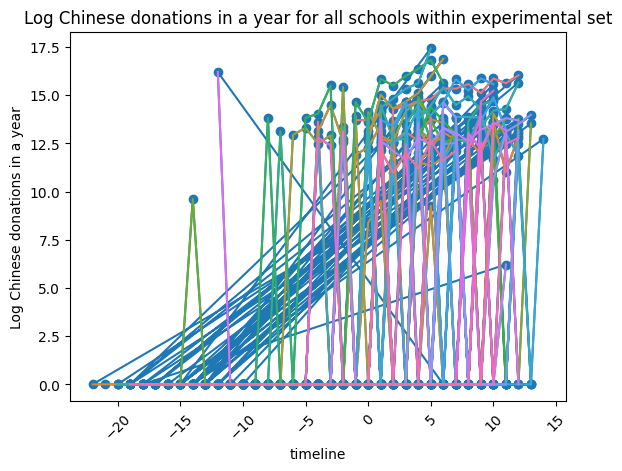

In [105]:
# compile graphs for 57 schools 



# try combining all these lines into one figure

y = visualization_df['china_donation_log'] 
x = visualization_df['timeline']
c =visualization_df['university_state']
fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x, y)
plt.title("Log Chinese donations in a year for all schools within experimental set")
plt.xlabel("timeline")
plt.ylabel("Log Chinese donations in a year")





plt.xticks(rotation=45)

break_graph = sns.lineplot(x= x, y= y, hue = c)

ax.get_legend().set_visible(False)

break_graph.figure.savefig('timeline_graph.png', bbox_inches='tight')


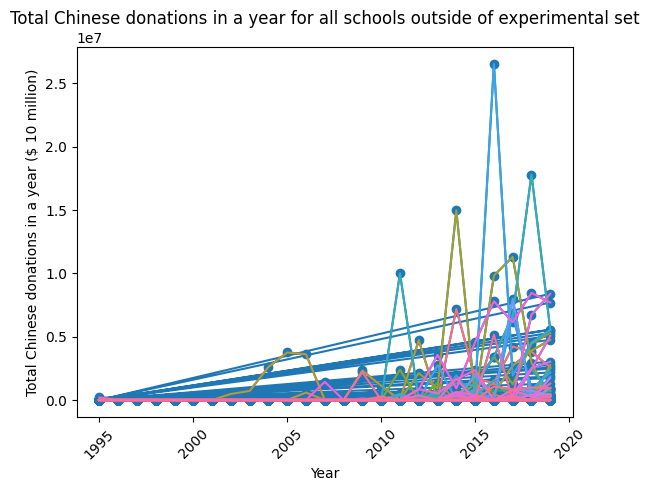

In [106]:
# do similar graph for all universities except the ones with a CI AND Chinese donations
# try with only public schools
break_df = survival_df[(survival_df['public']==1)&~((survival_df['all_year_china_donations']>0) & (survival_df['CI_ever']==1))]

break_names = break_df['university_state'].unique()

# try combining all these lines into one figure

y = break_df['total_china_donation']
x = break_df['year']
c =break_df['university_state']
fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x, y)
plt.title("Total Chinese donations in a year for all schools outside of experimental set")
plt.xlabel("Year")
plt.ylabel("Total Chinese donations in a year ($ 10 million)")





plt.xticks(rotation=45)

break_graph = sns.lineplot(x= x, y= y, hue = c)

ax.get_legend().set_visible(False)

break_graph.figure.savefig('break_graph.png', bbox_inches='tight')



In [107]:
survival_df



# validation
len(survival_df['university_state'].unique())-(len(break_names)+len(uni_names))

247

In [144]:
normalized_df[normalized_df['university_state'] == 'Xavier University of Louisiana_LA']

,university_state,schoolname,state,public,year,CI_ever,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations,china_donation_log_non_norm,timeline,china_donation_log
15260,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,1995,1.0,1.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-17.0,0.000000
15261,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,1996,1.0,2.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-16.0,0.000000
15262,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,1997,1.0,3.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-15.0,0.000000
15263,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,1998,1.0,4.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-14.0,0.000000
15264,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,1999,1.0,5.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-13.0,0.000000
15265,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2000,1.0,6.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-12.0,0.000000
15266,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2001,1.0,7.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-11.0,0.000000
15267,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2002,1.0,8.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-10.0,0.000000
15268,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2003,1.0,9.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-9.0,0.000000
15269,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,2004,1.0,10.0,0.0,NaN,0.461971,0.0,0.0,1.154966e+09,2.500083e+09,1078144.0,20578144.0,0.000000,-8.0,0.000000


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/788032944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df_grouped['timeline_grouped'] = pd.cut(ols_df_grouped['timeline'], bins=6)
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/788032944.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ols_df_grouped['ma_china_donation'] = ols_df_grouped.groupby(['university_state','timeline_grouped'])['total_china_donation'].transform('mean')
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/788032944.py:6: SettingW

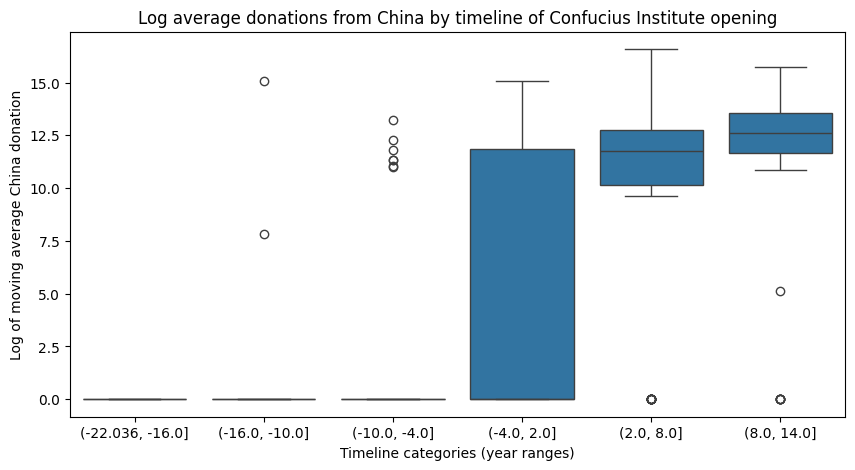

In [135]:
ols_df_grouped = normalized_df[['university_state','schoolname','state', 'year', 'public', 'federal_share', 'total_china_donation', 'timeline']]


ols_df_grouped['timeline_grouped'] = pd.cut(ols_df_grouped['timeline'], bins=6)

ols_df_grouped['ma_china_donation'] = ols_df_grouped.groupby(['university_state','timeline_grouped'])['total_china_donation'].transform('mean')




ols_df_grouped = ols_df_grouped.rename(columns={"timeline_grouped": "T_"})
ols_df_grouped = ols_df_grouped[['university_state','schoolname','state', 'year',  'public', 'federal_share', 'ma_china_donation', 'T_']]

# fix data grouping

ols_df_grouped[ols_df_grouped['university_state']=='Alfred University_NY']

ols_df_grouped = ols_df_grouped[['university_state','schoolname','state', 'public', 'federal_share', 'ma_china_donation', 'T_']]

ols_df_grouped = ols_df_grouped.drop_duplicates()

# make graph from using this data before dummies were created

china_donation_log = []


visualization_df = ols_df_grouped
for i in visualization_df['ma_china_donation']:
    if i !=0:
        china_donation_log.append(math.log(i))
    else:
        i_mod = i+1
        china_donation_log.append(math.log(i_mod))
        
visualization_df['china_donation_log'] = china_donation_log


plt.figure(figsize=[10, 5])




ax = sns.boxplot(x="T_",
                y="china_donation_log",
                data=visualization_df).set(xlabel ="Timeline categories (year ranges)", ylabel = 'Log of moving average China donation', title = "Log average donations from China by timeline of Confucius Institute opening")


plt.savefig("ols.png") 

ols_df_grouped = pd.get_dummies(ols_df_grouped, columns=['T_'],
               drop_first=True)


In [137]:
ols_df_grouped[ols_df_grouped['university_state'] == 'Xavier University of Louisiana_LA']

,university_state,schoolname,state,public,federal_share,ma_china_donation,china_donation_log,"T__(-16.0, -10.0]","T__(-10.0, -4.0]","T__(-4.0, 2.0]","T__(2.0, 8.0]","T__(8.0, 14.0]"
15260,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,0.461971,0.000000,0.000000,False,False,False,False,False
15262,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,0.461971,0.000000,0.000000,True,False,False,False,False
15268,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,0.461971,0.000000,0.000000,False,True,False,False,False
15274,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,0.461971,41315.166667,10.628985,False,False,True,False,False
15280,Xavier University of Louisiana_LA,Xavier University of Louisiana,LA,0.0,0.461971,166050.600000,12.020048,False,False,False,True,False


In [109]:
# summary stats tables for latex

from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from IPython.core.display import HTML
summary_df = survival_df_clean[['university_state','public', 'year', 'CI_ever', 'CI_survival_years', 'CI_opening', 'federal_share', 'all_year_china_donations']]
summary_df_china_ever = survival_df_clean[['university_state','public', 'year', 'CI_ever', 'CI_survival_years', 'CI_opening', 'federal_share', 'all_year_china_donations']]


# convert these tables into latex


# summary for public
summary_stats_pub = np.round(summary_df.groupby('public').describe(percentiles = []), 2).T

# summary for CI ever 

summary_stats_CI_ever = np.round(summary_df.groupby('CI_ever').describe(percentiles = []), 2).T

# summary for CI ever and public

summary_stats_CI_pub = np.round(summary_df.groupby(['CI_ever', 'public']).describe(percentiles = []), 2).T


summary_df_china_ever['china_ever'] = np.where((summary_df_china_ever['all_year_china_donations']>0), 1, 0)


# summary for ever taken Chinese donation

summary_stats_china_ever = np.round(summary_df_china_ever.groupby('china_ever').describe(percentiles = []), 2).T



# summary for ever taken Chinese donation and public

summary_stats_china_pub = np.round(summary_df_china_ever.groupby(['china_ever', 'public']).describe(percentiles = []), 2).T






/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1204976198.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_china_ever['china_ever'] = np.where((summary_df_china_ever['all_year_china_donations']>0), 1, 0)


In [110]:



len(summary_df_china_ever[(summary_df_china_ever['china_ever']>0)&(summary_df_china_ever['CI_ever']==1)])

len(summary_df_china_ever[(summary_df_china_ever['china_ever']==1)&(summary_df_china_ever['CI_ever']==1)])


len(summary_df)


528

In [111]:
# summary stats tables for latex

from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from IPython.core.display import HTML
summary_df = survival_df_clean[['university_state','public', 'year', 'CI_ever', 'CI_survival_years', 'CI_opening', 'federal_share', 'all_year_china_donations']]
summary_df_china_ever = survival_df_clean[['university_state','public', 'year', 'CI_ever', 'CI_survival_years', 'CI_opening', 'federal_share', 'all_year_china_donations']]


# convert these tables into latex


# summary for public
summary_stats_pub = np.round(summary_df.groupby('public').describe(percentiles = []), 2).T




# summary for CI ever 

summary_stats_CI_ever = np.round(summary_df.groupby('CI_ever').describe(percentiles = []), 2).T

# summary for CI ever and public

summary_stats_CI_pub = np.round(summary_df.groupby(['CI_ever', 'public']).describe(percentiles = []), 2).T


summary_df_china_ever['china_ever'] = np.where((summary_df_china_ever['all_year_china_donations']>0), 1, 0)


# summary for ever taken Chinese donation

summary_stats_china_ever = np.round(summary_df_china_ever.groupby('china_ever').describe(percentiles = []), 2).T



# summary for ever taken Chinese donation and public

summary_stats_china_pub = np.round(summary_df_china_ever.groupby(['china_ever', 'public']).describe(percentiles = []), 2).T






/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/4079875496.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df_china_ever['china_ever'] = np.where((summary_df_china_ever['all_year_china_donations']>0), 1, 0)


In [112]:


print('\section{Summary statistics for universities by public or private}')
print(summary_stats_pub.to_latex())



print('\section{Summary statistics for universities by which ones have ever had a CI}')
print(summary_stats_CI_ever.to_latex())

print('\section{Summary statistics for universities by which ones have ever had a CI separated by public and private}')

print(summary_stats_CI_pub.to_latex())


# use long table
print('\section{Summary statistics for universities by which ones have ever taken China money}')
print(summary_stats_china_ever.to_latex())


# use long table

print('\section{Summary statistics for universities by ever having taken China money separated by public or private}')

print(summary_stats_china_pub.to_latex())



\section{Summary statistics for universities by public or private}
\begin{tabular}{llrr}
\toprule
 & public & 0.000000 & 1.000000 \\
\midrule
\multirow[t]{6}{*}{year} & count & 251.000000 & 272.000000 \\
 & mean & 2018.570000 & 2016.960000 \\
 & std & 1.920000 & 4.180000 \\
 & min & 2007.000000 & 2005.000000 \\
 & 50% & 2019.000000 & 2019.000000 \\
 & max & 2019.000000 & 2019.000000 \\
\cline{1-4}
\multirow[t]{6}{*}{CI_ever} & count & 251.000000 & 272.000000 \\
 & mean & 0.050000 & 0.210000 \\
 & std & 0.220000 & 0.410000 \\
 & min & 0.000000 & 0.000000 \\
 & 50% & 0.000000 & 0.000000 \\
 & max & 1.000000 & 1.000000 \\
\cline{1-4}
\multirow[t]{6}{*}{CI_survival_years} & count & 13.000000 & 57.000000 \\
 & mean & 1.000000 & 1.000000 \\
 & std & 0.000000 & 0.000000 \\
 & min & 1.000000 & 1.000000 \\
 & 50% & 1.000000 & 1.000000 \\
 & max & 1.000000 & 1.000000 \\
\cline{1-4}
\multirow[t]{6}{*}{CI_opening} & count & 251.000000 & 272.000000 \\
 & mean & 0.050000 & 0.210000 \\
 & std & 0.220

In [138]:
ma_china_donation_log = []

for i in ols_df_grouped['ma_china_donation']:
    if i !=0:
        ma_china_donation_log.append(math.log(i))
    else:
        i_mod = i+1
        ma_china_donation_log.append(math.log(i_mod))
        
ols_df_grouped['ma_china_donation_log'] = ma_china_donation_log

    

In [139]:
ols_df_grouped.to_csv('normalized_data')



In [153]:
ols_df_grouped[ols_df_grouped['university_state'] == 'Arizona State University_AZ']

non_normalized_df[non_normalized_df['university_state'] == 'Arizona State University_AZ']


,university_state,schoolname,state,public,year,CI_ever,No_CI_years,CI_opening,CI_survival_years,federal_share,total_china_donation,cumulative_china_donations,all_year_federal10,all_year_tot_rev_wo_auxother_sum,all_year_china_donations,all_year_foreign_donations,china_donation_log_non_norm
196,Arizona State University_AZ,Arizona State University,AZ,1.0,1995,1.0,1.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
197,Arizona State University_AZ,Arizona State University,AZ,1.0,1996,1.0,2.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
198,Arizona State University_AZ,Arizona State University,AZ,1.0,1997,1.0,3.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
199,Arizona State University_AZ,Arizona State University,AZ,1.0,1998,1.0,4.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
200,Arizona State University_AZ,Arizona State University,AZ,1.0,1999,1.0,5.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
201,Arizona State University_AZ,Arizona State University,AZ,1.0,2000,1.0,6.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
202,Arizona State University_AZ,Arizona State University,AZ,1.0,2001,1.0,7.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
203,Arizona State University_AZ,Arizona State University,AZ,1.0,2002,1.0,8.0,0.0,NaN,0.238863,0.0,0.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000
204,Arizona State University_AZ,Arizona State University,AZ,1.0,2003,1.0,9.0,0.0,NaN,0.238863,820000.0,820000.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,13.617060
205,Arizona State University_AZ,Arizona State University,AZ,1.0,2004,1.0,10.0,0.0,NaN,0.238863,0.0,820000.0,8.513125e+09,3.564025e+10,52573649.0,153510295.0,0.000000


In [120]:
# OLS without interactions
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from IPython.core.display import HTML

 
y =ols_df_grouped['ma_china_donation_log']

x = ols_df_grouped[['public','T__(-16.0, -10.0]','T__(-10.0, -4.0]','T__(-4.0, 2.0]','T__(2.0, 8.0]','T__(8.0, 14.0]']]

x = sm.add_constant(x)



# adding the constant term
 
# performing the regression
# and fitting the model
result_1 = sm.OLS(y, x.astype(float)).fit()
 
# printing the summary table

# make graphs from using pregrouped 

In [124]:

# OLS with interactions

import statsmodels.api as sm

 
y =ols_df_grouped['ma_china_donation_log']

x = ols_df_grouped[['public','T__(-16.0, -10.0]','T__(-10.0, -4.0]','T__(-4.0, 2.0]','T__(2.0, 8.0]','T__(8.0, 14.0]']]

x = sm.add_constant(x)

x['int_1'] = x['public']*x['T__(2.0, 8.0]']
x['int_2'] = x['public']*x['T__(8.0, 14.0]']

# adding the constant term
 
# performing the regression
# and fitting the model
result_3 = sm.OLS(y, x.astype(float)).fit()
 


In [125]:

# Public OLS regression

import statsmodels.api as sm

data_pub = ols_df_grouped[ols_df_grouped['public']==1]
y =data_pub['ma_china_donation_log']
x = data_pub[['T__(-16.0, -10.0]','T__(-10.0, -4.0]','T__(-4.0, 2.0]','T__(2.0, 8.0]','T__(8.0, 14.0]']]

x = sm.add_constant(x)


# adding the constant term
 
# performing the regression
# and fitting the model
result_4 = sm.OLS(y, x.astype(float)).fit()
 


In [127]:

# Private OLS regression

import statsmodels.api as sm

data_priv = ols_df_grouped[ols_df_grouped['public']==0]
y =data_priv['ma_china_donation_log']
x = data_priv[['T__(-16.0, -10.0]','T__(-10.0, -4.0]','T__(-4.0, 2.0]','T__(2.0, 8.0]','T__(8.0, 14.0]']]

x = sm.add_constant(x)


# adding the constant term
 
# performing the regression
# and fitting the model
result_5 = sm.OLS(y, x.astype(float)).fit()
 





/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1603975358.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df_binary['timeline_sep'] = ols_df_binary['timeline'].apply(timeline_sep)
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1603975358.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ols_df_binary['ma_china_donation'] = ols_df_binary.groupby(['university_state','timeline_sep'])['total_china_donation'].transform('mean')
/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr

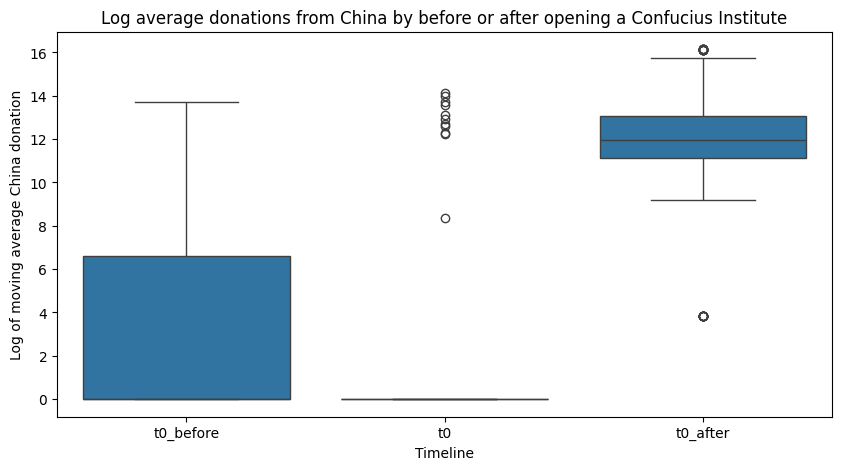

In [128]:
# remove duplicate rows form cross tab

import seaborn as sns


ols_df_binary = normalized_df[['university_state','schoolname','state', 'year', 'public', 'federal_share', 'total_china_donation', 'timeline']]

def timeline_sep(x):
    if 0 < x:
        return 't0_after'
    elif x==0:
        return 't0'
    else:
        return 't0_before'

    
ols_df_binary['timeline_sep'] = ols_df_binary['timeline'].apply(timeline_sep)




ols_df_binary['ma_china_donation'] = ols_df_binary.groupby(['university_state','timeline_sep'])['total_china_donation'].transform('mean')



ma_china_donation_log_bin = []

for i in ols_df_binary['ma_china_donation']:
    if i !=0:
        ma_china_donation_log_bin.append(math.log(i))
    else:
        i_mod = i+1
        ma_china_donation_log_bin.append(math.log(i_mod))
        
ols_df_binary['ma_china_donation_log'] = ma_china_donation_log_bin



ols_df_binary = ols_df_binary[['university_state','schoolname','state', 'year',  'public', 'federal_share', 'ma_china_donation_log', 'timeline_sep']]

# fix data grouping


ols_df_binary = ols_df_binary[['university_state','schoolname','state', 'public', 'federal_share', 'ma_china_donation_log', 'timeline_sep']]

plt.figure(figsize=[10, 5])


ax = sns.boxplot(x="timeline_sep",
                y="ma_china_donation_log",
                data=ols_df_binary).set(xlabel ="Timeline", ylabel = 'Log of moving average China donation', title = "Log average donations from China by before or after opening a Confucius Institute")


plt.savefig("ols_binary.png") 

ols_df_binary = pd.get_dummies(ols_df_binary, columns=['timeline_sep'],
               drop_first=True)




In [129]:
# Binary OLS regression
import statsmodels.api as sm

 
y = ols_df_binary[['ma_china_donation_log']]

x = ols_df_binary[['timeline_sep_t0_after']]


x['t0_after'] = x[['timeline_sep_t0_after']]

x = x['t0_after']
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result_2 = sm.OLS(y, x.astype(float)).fit()
 
# printing the summary table

stargazer = Stargazer([result_1, result_2, result_3, result_4, result_5])




HTML(stargazer.render_latex())


/var/folders/rc/yw7v7vhj4l3_vjznh0cwm8wr0000gn/T/ipykernel_5841/1298475913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['t0_after'] = x[['timeline_sep_t0_after']]


In [146]:
# make dummy variable with timeline
# pivot data wide with timeline variable

ols_df = normalized_df[['university_state','schoolname','state', 'year', 'public', 'federal_share', 'total_china_donation', 'timeline']]

ols_df = ols_df.rename(columns={"timeline": "index"})

ols_df = (
    pd.crosstab([ols_df["university_state"], ols_df["schoolname"], ols_df["state"], ols_df["year"], ols_df["public"],  ols_df["total_china_donation"]], ols_df["index"], )
    .gt(0)
    .astype(int)
    .reset_index()
)





ols_df.columns = [f'T_{i}' if i not in ['university_state','schoolname','state', 'year', 'public', 'federal_share', 'total_china_donation'] else f'{i}' for i in ols_df.columns]


# try grouping by column values to make groups
# calcualte moving average using grouped data
# try making dummy variable by if a variable is in a certain range of years ie., data in T-22, T_-21, T-19 or etc

In [147]:


#ols_df.columns[6:]


In [148]:
# modify this OLS code

import statsmodels.api as sm

 
y = ols_df[['total_china_donation']]/1000000

x = ols_df[['public', 'T_-22.0', 'T_-21.0', 'T_-20.0', 'T_-19.0', 'T_-18.0', 'T_-17.0',
       'T_-16.0', 'T_-15.0', 'T_-14.0', 'T_-13.0', 'T_-12.0', 'T_-11.0',
       'T_-10.0', 'T_-9.0', 'T_-8.0', 'T_-7.0', 'T_-6.0', 'T_-5.0', 'T_-4.0',
       'T_-3.0', 'T_-2.0', 'T_-1.0', 'T_0.0', 'T_1.0', 'T_2.0', 'T_3.0',
       'T_4.0', 'T_5.0', 'T_6.0', 'T_7.0', 'T_8.0', 'T_9.0', 'T_10.0',
       'T_11.0', 'T_12.0', 'T_13.0', 'T_14.0']]


 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     total_china_donation   R-squared:                       0.079
Model:                              OLS   Adj. R-squared:                  0.054
Method:                   Least Squares   F-statistic:                     3.213
Date:                  Wed, 27 Mar 2024   Prob (F-statistic):           5.30e-10
Time:                          13:28:28   Log-Likelihood:                -2612.9
No. Observations:                  1425   AIC:                             5302.
Df Residuals:                      1387   BIC:                             5502.
Df Model:                            37                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6757      0.116

In [150]:
survival_df_clean = survival_df_clean.rename({'No_CI_years': 'survival_years'}, axis=1)



survival_df_clean['status'] = survival_df_clean['status'].astype('bool')




survival_df_clean

%matplotlib inline
import matplotlib.pyplot as plt

import sksurv

from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob, conf_int = kaplan_meier_estimator(
    survival_df_clean["status"], survival_df_clean["survival_years"], conf_type="log-log"
)
plt.step(time, survival_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of not having a CI $\hat{S}(t)$")
plt.xlabel("time in years $t$")
plt.title('Probability of not having a Confucius Institute over time')


plt.savefig('CI_survival.png', bbox_inches='tight')



ModuleNotFoundError: No module named 'sksurv'

In [ ]:
#survival_df_clean['survival_odds'] = survival_df_clean['survival_years']/max(survival_df_clean['survival_years'])
survival_df_clean['CI_ever'] = survival_df_clean['CI_ever'].astype('bool')


china_donations = survival_df_clean[survival_df_clean['cumulative_china_donations'].notna()]



# try this https://stats.stackexchange.com/questions/496329/converting-survival-analysis-by-a-continuous-variable-to-categorical-so-as-to-fi
CI_ever, survival_prob, conf_int = kaplan_meier_estimator(
    china_donations["status"], china_donations["cumulative_china_donations"], conf_type="log-log"
)
plt.step(CI_ever, survival_prob, where="post")
plt.fill_between(CI_ever, conf_int[0], conf_int[1], alpha=0.25, step="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of not having a CI $\hat{S}(t)$")
plt.xlabel("Cumulative Chinese dollar donations recieved in 100,000,000's")
plt.title('Probability of not having a Confucius Institute compared to Chinese donations')

plt.savefig('chinese_donation_survival.png', bbox_inches='tight')



In [ ]:
# do this graph with Chinese donations on the X axis
# See what happens with Chinese donations once Confucius Institutes close
# Try clumping donation years together to deal with NaN values
# Has CI funding dropped a lot after CI closed?
# Has school relaunched Confucius Institutes with rebrand
# Check Katherine data to see which CI's survived but in different form

for public in (0, 1):
    mask_treat = survival_df_clean["public"] == public
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        survival_df_clean["CI_ever"][mask_treat],
        survival_df_clean["survival_years"][mask_treat])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Public = %s" % public)

plt.ylabel("est. probability of not having a CI $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Survival rate of not having a Confucius Institute for public and private schools')
plt.legend(loc="best")

plt.savefig('pub_vs_priv_survival.png', bbox_inches='tight')


In [ ]:
# make new variable for cumulative China donations that stops once the University opens a Confucisus Institute
# use this new variable as a time scale


for public in (0, 1):
    mask_treat = survival_df_clean["public"] == public
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        survival_df_clean["status"][mask_treat],
        survival_df_clean["cumulative_china_donations"][mask_treat])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Public = %s" % public)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Cumulative Chinese dollar donations in 100,000,000's")
plt.title('Survival rate of not having a Confucius Institute for public and private schools')
plt.legend(loc="best")

plt.savefig('pub_vs_priv_money_survival.png', bbox_inches='tight')


In [ ]:
survival_df_clean['avg_china_donations']= survival_df_clean['all_year_china_donations']/(2020-1995)
survival_df_clean['avg_china_donations'].hist()


plt.title('Histogram of yearly donations')

plt.savefig('donation_histogram.png', bbox_inches='tight')


In [ ]:
# make survival grah with 0 being cutoff for Chinese donations
# make binary variable for china donation

survival_df_clean['china_ever'] = np.where(survival_df_clean['avg_china_donations'] > 0, 1, 0)


for china_ever in (0, 1):
    mask_treat = survival_df_clean["china_ever"] == china_ever
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        survival_df_clean["status"][mask_treat],
        survival_df_clean["survival_years"][mask_treat])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="china_ever = %s" % china_ever)

plt.ylabel("est. probability of not having a CI $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Probability of not having a Confucius Institute by having ever taken a donation from China')
plt.legend(loc="best")

plt.savefig('china_donation_survival.png', bbox_inches='tight')



In [ ]:
# make graph where you groupby CI ever and not CI

# find mean closing year
# see how much donations change past mean closing year




master_df_enroll['CI_survival'] = master_df_enroll['CI_open'].diff()

master_df_enroll[master_df_enroll['schoolname']=='Arizona State University']



CI_close_year = master_df_clean[master_df_clean['CI_survival']==-1]

CI_close_year['CI_close_year']= 1

master_df_enroll= master_df_enroll.merge(CI_close_year, how = 'left')

master_df_enroll['CI_close_year']=  master_df_enroll['CI_close_year'].fillna(0)

# group by close year and find mean close year
# check how average donations change before and after mean close year


In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder
from lifelines import CoxPHFitter


#split data into data_x and data_y 

survival_model = survival_df_clean.dropna()



# try binary version of donation vs non China donation for CI survival
# Look at overall distribution of funding and draw line for significant vs non-sihgnficant funding
# for every metric (average annual Chinese donation), check the distirbtuion with a histogram for Chinese donations
# use bottom point of histogram to see the cutoff to make two distinctive
# also figure out how to interpret Cox PH regression
# check distribution of public vs private universities in data set
# look up some literature on confucius institues in public vs private
# look at literature on Chinese influence in public vs private universties
# look at NAS studies on Confucius Institue work




In [ ]:
survival_model_public = survival_df_clean[survival_df_clean['public'].notna()]

cph = CoxPHFitter()
survival_years = cph.fit(survival_model_public, duration_col = 'survival_years', event_col = 'status', formula= "public + all_year_china_donations + all_year_foreign_donations")
cph.print_summary()


print('Being a public university increases the hazard for getting a CI by a factor of 4.42, or ',(4.42-1)*100,'%' )



In [ ]:
# install stargazer
from stargazer.stargazer import Stargazer

cph = CoxPHFitter()
survival_years = cph.fit(survival_model, duration_col = 'survival_years', event_col = 'status', formula= "public + all_year_federal10 + all_year_tot_rev_wo_auxother_sum+all_year_china_donations+all_year_foreign_donations")
cph.print_summary()


print('Being a public university increases the hazard for getting a CI by a factor of 4.19, or ',(4.19-1)*100,'%' )





In [ ]:

cph = CoxPHFitter()
donation_cph = cph.fit(survival_model, duration_col = 'cumulative_china_donations', event_col = 'status', formula= "public + all_year_federal10 + all_year_tot_rev_wo_auxother_sum+all_year_foreign_donations")
donation_cph.print_summary()


print('Being a public university increases the hazard for getting a CI as Chinese donation money increases by a factor of 3.68, or ',(3.68-1)*100,'%' )

In [ ]:
pie_df = survival_df_clean.groupby('public').count().reset_index()

pie_df = pie_df[['public','university_state']]


pie_df = pie_df.rename(columns={"university_state": "Number of Schools"})



pie_df['school_type'] = pie_df['public'].map({0: 'private', 1: 'public'})


labels = pie_df['school_type']
sizes = pie_df['Number of Schools']




fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

plt.title('Share of Public and Private Universities')

fig.figure.savefig('public_private_pie.png', bbox_inches='tight')

pie_df


In [ ]:
CI_universities = survival_df_clean[survival_df_clean['CI_ever']==1]


pie_df = CI_universities.groupby('public').count().reset_index()

pie_df = pie_df[['public','university_state']]


pie_df = pie_df.rename(columns={"university_state": "Number of Schools"})



pie_df['school_type'] = pie_df['public'].map({0: 'private', 1: 'public'})


labels = pie_df['school_type']
sizes = pie_df['Number of Schools']




fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

plt.title('Share of Public and Private Universities that ever had a CI')

fig.figure.savefig('public_private_CI_pie.png', bbox_inches='tight')

pie_df

In [ ]:
No_CI_China = survival_df_clean.loc[(survival_df_clean['CI_ever'] == False) & (survival_df_clean['cumulative_china_donations'] >0)]




pie_df = No_CI_China.groupby('public').count().reset_index()

pie_df = pie_df[['public','university_state']]


pie_df = pie_df.rename(columns={"university_state": "Number of Schools"})



pie_df['school_type'] = pie_df['public'].map({0: 'private', 1: 'public'})


labels = pie_df['school_type']
sizes = pie_df['Number of Schools']




fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

plt.title('Share of Public and Private Universities that never had a CI but took China money')

fig.figure.savefig('public_private_No_CI_China_pie.png', bbox_inches='tight')

pie_df



In [ ]:
No_CI_China['university_state'].unique()

In [ ]:
pie_df

In [ ]:
survival_df_clean

In [ ]:

summary_stats = np.round(master_df_clean.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

summary_stats_CI = np.round(master_df_clean[master_df_clean['CI_ever'] == 1].describe(), 2).T[['count','mean', 'std', 'min', 'max']]


summary_stats_no_CI = np.round(master_df_clean[master_df_clean['CI_ever'] == 0].describe(), 2).T[['count','mean', 'std', 'min', 'max']]


CI_survival = survival_df_clean.loc[(survival_df_clean['CI_ever'] == True)]
    
    

summary_stats_survival = np.round(survival_df_clean.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

CI_survival_summary = np.round(CI_survival.describe(), 2).T[['count','mean', 'std', 'min', 'max']]


No_CI_China_summary = np.round(No_CI_China.describe(), 2).T[['count','mean', 'std', 'min', 'max']]



descriptive_stats_list= [summary_stats, summary_stats_CI, summary_stats_no_CI]


descriptive_stats_names=  ['summary_stats', 'summary_stats_CI', 'summary_stats_no_CI']

import matplotlib.pyplot as plt
from pandas.plotting import table



for i, j in zip(descriptive_stats_list, descriptive_stats_names):
    plot = plt.subplot(111, frame_on=False)


    #remove axis
    plot.xaxis.set_visible(False) 
    plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
    table(plot, i, loc='upper right')
    plt.savefig(j +'.png', bbox_inches='tight')


In [ ]:
No_CI_survival = survival_df_clean.loc[(survival_df_clean['CI_ever'] == False)]
No_CI_survival_summary = np.round(No_CI_survival.describe(), 2).T[['count','mean', 'std', 'min', 'max']]


In [ ]:


descriptive_survival_list= [No_CI_China_summary, summary_stats_survival, CI_survival_summary, No_CI_survival_summary]


descriptive_survival_names=  ['No_CI_China_summary', 'summary_stats_survival', 'CI_survival_summary', 'No_CI_survival_summary']

import matplotlib.pyplot as plt
from pandas.plotting import table



for i, j in zip(descriptive_survival_list, descriptive_survival_names):
    plot = plt.subplot(111, frame_on=False)


    #remove axis
    plot.xaxis.set_visible(False) 
    plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
    table(plot, i, loc='upper right')
    plt.savefig(j +'.png', bbox_inches='tight')

In [ ]:
No_CI_survival_summary['CI_ever'].unique()

In [ ]:
# Graph output settings
import matplotlib.pyplot as plt




# put school name here
schoolname ="Arizona State University"

# put state code here

st = "AZ"

school_for_analysis = schoolname+'_'+st




year = 2006


master_df_clean[master_df_clean['schoolname']=='Arizona State University']


In [ ]:
example_graph = master_df_clean.groupby(['state'])['china_donation_over_federal'].mean().reset_index()

example_graph = example_graph.sort_values('china_donation_over_federal',ascending = False).head(10)

# filter this graph by top 5 states
x=example_graph['state']

y = example_graph['china_donation_over_federal']


plt.title('Top ten states that have the highest mean proportion of Chinese donations compared to federal funds')


plt.xticks(rotation=0, )

plt.tick_params(axis='x', which='major', labelsize=7)


example_donation_plot = sns.barplot(x= x, y= y)


example_donation_plot.figure.savefig('Chinese_donation_reliance_by_state.png', bbox_inches='tight')


# covert this data into a bar graph

master_df_clean[master_df_clean['total_foreign_donation']==0]

In [ ]:
example_graph = master_df_clean.groupby(['public', 'year'])['china_donation_over_federal'].mean().reset_index()

x=example_graph['year']

y = example_graph['china_donation_over_federal']
c =example_graph['public']

plt.title('Time series for public vs private proportion of Chinese donations to federal funds')


plt.xticks(rotation=45)


example_donation_plot = sns.barplot(x= x, y= y, hue= c)


example_donation_plot.figure.savefig('Chinese_donation_reliance.png', bbox_inches='tight')


# covert this data into a bar graph

In [ ]:
china_donation_2016 = master_df_clean[(master_df_clean['year']==2016)&(master_df_clean['public']==0)&(master_df_clean['china_donation'].notna())]

china_donation_2016.sort_values(by=['china_donation_over_federal'], ascending=False).head(10)

In [ ]:
# fix this pie chart!!
example_graph = master_df_clean.groupby(['public', 'CI_ever']).size().reset_index()


example_graph = example_graph.rename(columns = {0: 'count'})

x= example_graph['public']

y = example_graph['count']
c =example_graph['CI_ever']

CI_pub_plot = sns.barplot(x= x, y= y, hue= c)

plt.title('Number of public and private Universities that have ever had a CI')


CI_pub_plot.figure.savefig('CI_pub_plot.png', bbox_inches='tight')



In [ ]:


example_graph = master_df_clean[master_df_clean['university_state'].isin([school_for_analysis])]


x=example_graph['year']

y = example_graph['total_china_donation']
c =example_graph['CI_open']

plt.title('Time series for '+schoolname+' CI open years and Chinese donations')


plt.xticks(rotation=45)


example_donation_plot = sns.barplot(x= x, y= y, hue= c)


example_donation_plot.figure.savefig('example_donation_plot.png', bbox_inches='tight')



In [ ]:
import matplotlib.pyplot as plt

example_graph = master_df_clean[master_df_clean['university_state'].isin([school_for_analysis])]


x=example_graph['year']

y = example_graph['china_donation_over_federal']
c =example_graph['CI_open']

plt.title('Time series for '+schoolname+ ' CI open years and ratio of Chinese donations to Federal Funds')


plt.xticks(rotation=45)


example_donation_plot = sns.barplot(x= x, y= y, hue= c)

example_donation_plot.figure.savefig('school_ratio_federal_funds.png', bbox_inches='tight')



In [ ]:
len(master_df_clean[master_df_clean['r']=='R']['university_state'].unique())

In [ ]:
example_replacement =  master_df_clean[master_df_clean['r']=='R']['university_state'].unique()[21]




example_graph = master_df_clean[master_df_clean['university_state'].isin([example_replacement])]

replacement_name  = example_graph['schoolname'].unique()[0]


x=example_graph['year']

y = example_graph['total_china_donation']
c =example_graph['CI_close_year']
schools = example_graph['schoolname']

plt.title('Time series for '+replacement_name+ ' total Chinese donations with a mark when the CI closed')


plt.xticks(rotation=45)

example_donation_plot = sns.lineplot(x= x, y= y)


example_donation_plot = sns.scatterplot(x= x, y= y, hue= c, s = 100)


example_donation_plot.figure.savefig('CI_replaced_graph.png', bbox_inches='tight')




In [ ]:


example_graph = master_df_clean[master_df_clean['university_state'].isin([school_for_analysis])]


x=example_graph['year']

y = example_graph['total_china_donation']
c =example_graph['CI_close_year']
schools = example_graph['schoolname']

plt.title('Time series for '+schoolname+ ' total Chinese donations with a mark when the CI closed')


plt.xticks(rotation=45)

example_donation_plot = sns.lineplot(x= x, y= y, hue = schools) 


example_donation_plot = sns.scatterplot(x= x, y= y, hue= c, s = 100)


example_donation_plot.figure.savefig('CI_closed_graph.png', bbox_inches='tight') 




In [ ]:
example_graph = master_df_clean[master_df_clean['university_state'].isin([school_for_analysis])]

 
x=example_graph['year']

y = example_graph['CI_open']
c =example_graph['china_donation']

plt.title('Time series for '+schoolname+ ' CI open years and if they recieved Chinese donations that year')



plt.xticks(rotation=45)




example_CI_binary_plot = sns.scatterplot(x= x, y= y, hue= c)


example_CI_binary_plot.figure.savefig('example_CI_binary_plot.png', bbox_inches='tight')


In [ ]:
master_df_clean[master_df_clean['schoolname']=="Alabama A&M University"]

df[df['schoolname']=="Harvard University"]




df[df['schoolname']=="Harvard University"]

master_df_clean[master_df_clean['schoolname']=="Harvard University"]


df[(df['schoolname']=="Arizona State University") & (df['receipt_year']==1996)]

 

df[(df['schoolname']=="Arizona State University")]

master_df_clean[master_df_clean['schoolname']=="Stanford University"]


master_df_clean[master_df_clean['schoolname']== "Harvard University"]

In [ ]:
survival_df_clean.to_stata('CI_survival_data_cleaned.dta')  


master_df_clean.to_stata('school_year_data_cleaned.dta')  


In [ ]:
master_df_clean.dtypes

